In [1]:
import tifffile
import numpy as np
import skimage.io as io
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib

import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context

In [2]:
sc.set_figure_params(format='png')
plt.rcParams.update({'font.size': 15})
sc.set_figure_params(scanpy=True, fontsize=25)

In [6]:
in_dir_1 = r'Y:\\coskun-lab\\Zhou\\4_HCR\\20210324_11gene\\expression_analysis'
in_dir_2 = r'Y:\\coskun-lab\\Zhou\\4_HCR\\20210507_cytokines\\uc\\expression_analysis'
out_dir = r'Y:\\coskun-lab\\Zhou\\4_HCR\\20210324_11gene\\expression_analysis'

bm_cells = pd.read_csv(os.path.join(in_dir_1, r'bm_abs_thre_expression_12_genes.csv'))
uc_cells_1 = pd.read_csv(os.path.join(in_dir_1, r'uc_abs_thre_expression_12_genes.csv'))
uc_cells_2 = pd.read_csv(os.path.join(in_dir_2, r'uc_abs_thre_expression_12_genes.csv'))

# uc_cells = pd.concat([uc_cells_1, uc_cells_2])

In [204]:
# bm_array = bm_cells.values[:,1:]
# uc_array = uc_cells_subframe.values[:,1:]
# bm_array_norm = bm_array/np.sum(bm_array, axis=1).reshape(bm_array.shape[0], 1)
# uc_array_norm = uc_array/np.sum(uc_array, axis=1).reshape(uc_array.shape[0], 1)

In [7]:
uc_cells_1

Unnamed: 0  GAPDH  ACTB  IL8  IL6  CCL11  COL1A1  NANOG  SOX9  EEF2  SPP1  \
0    uc_001_1   2587  1915  227  246     29    4749    147    40  1201    48   
1    uc_002_1   1857  4354   32   70     10      50      6    52   670   118   
2    uc_003_1   2087  2206   32  227     19    3857     17    52   867    30   
3    uc_003_2   1638  1199   24   68     10    1517     14    47   616    63   
4    uc_004_1   1447  3538   11   43     11       0      2    73   694    37   
..        ...    ...   ...  ...  ...    ...     ...    ...   ...   ...   ...   
76   uc_080_1    873    96   53   21     10    2334    295    19   140   145   
77   uc_083_1    747   394   50   40     15       4     98     6    74    13   
78   uc_088_1   1603  1429  898  302     19    5315   1320    23   295    53   
79   uc_088_2   1051   976   95  206     19    5965    734     5     6    30   
80   uc_091_1   1117   260   18   14      9       0      0    20   286    22   

    RUNX1  PDL1  
0      54    20  
1     106    47  
2     131    21  
3      68    13  
4      62    24  
..    ...   ...  
76     35    15  
77     12     6  
78    191     9  
79      0     1  
80     18    32  

[81 rows x 13 columns]

In [205]:
adata = sc.AnnData(np.concatenate((bm_cells.values[:,1:], uc_cells.values[:,1:])))
adata.var_names = bm_cells.columns.tolist()[1:]
adata.obs['Cell'] = bm_cells['cell_ID'].tolist()+uc_cells_subframe['cell_ID'].tolist()

raw_adata = sc.AnnData(np.concatenate((bm_array, uc_array)))
raw_adata.var_names = bm_cells.columns.tolist()[1:]
raw_adata.obs['Cell'] = bm_cells['cell_ID'].tolist() + uc_cells_subframe['cell_ID'].tolist()

ntpm_adata = sc.AnnData(np.concatenate((bm_array_norm, uc_array_norm)))
ntpm_adata.var_names = bm_cells.columns.tolist()[1:]
ntpm_adata.obs['Cell'] = bm_cells['cell_ID'].tolist() + uc_cells_subframe['cell_ID'].tolist()

In [206]:
sc.pp.scale(adata, max_value=2.5)

In [207]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [208]:
sc.tl.leiden(adata, resolution=1)

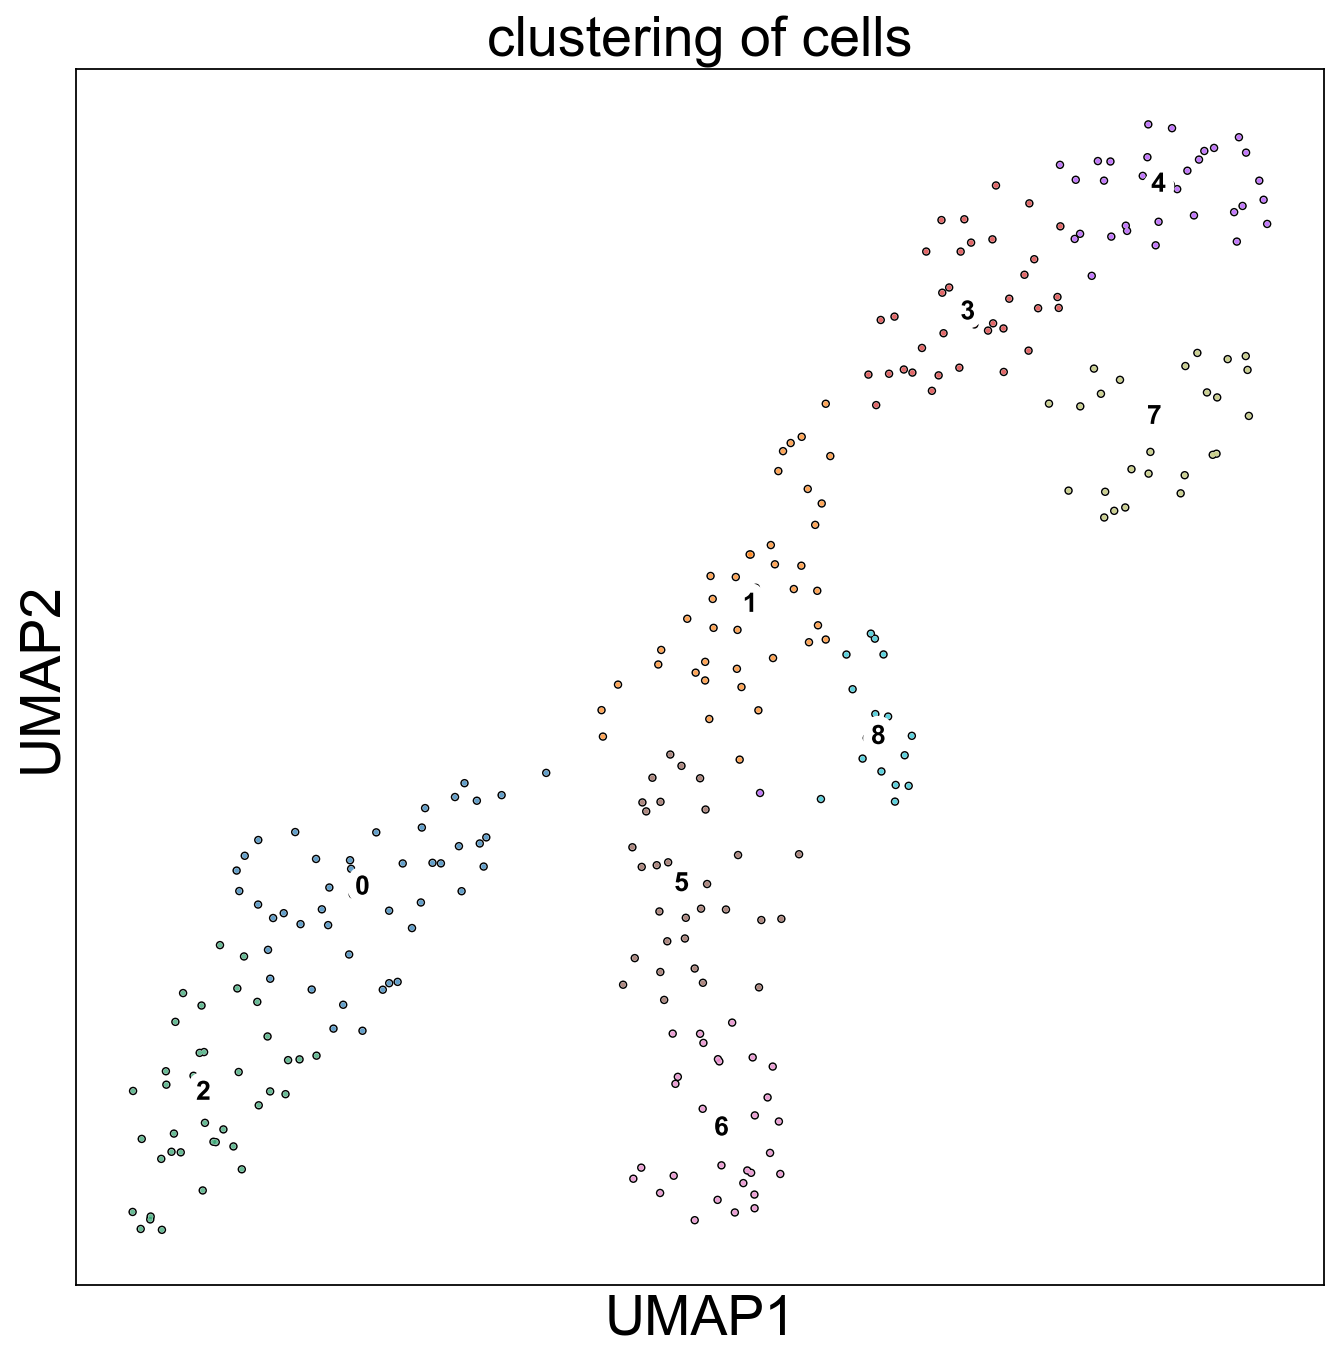

In [209]:
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=12, legend_fontoutline=8, 
               frameon=True,  title='clustering of cells', save=' 28 genes cluster umap v2.png')

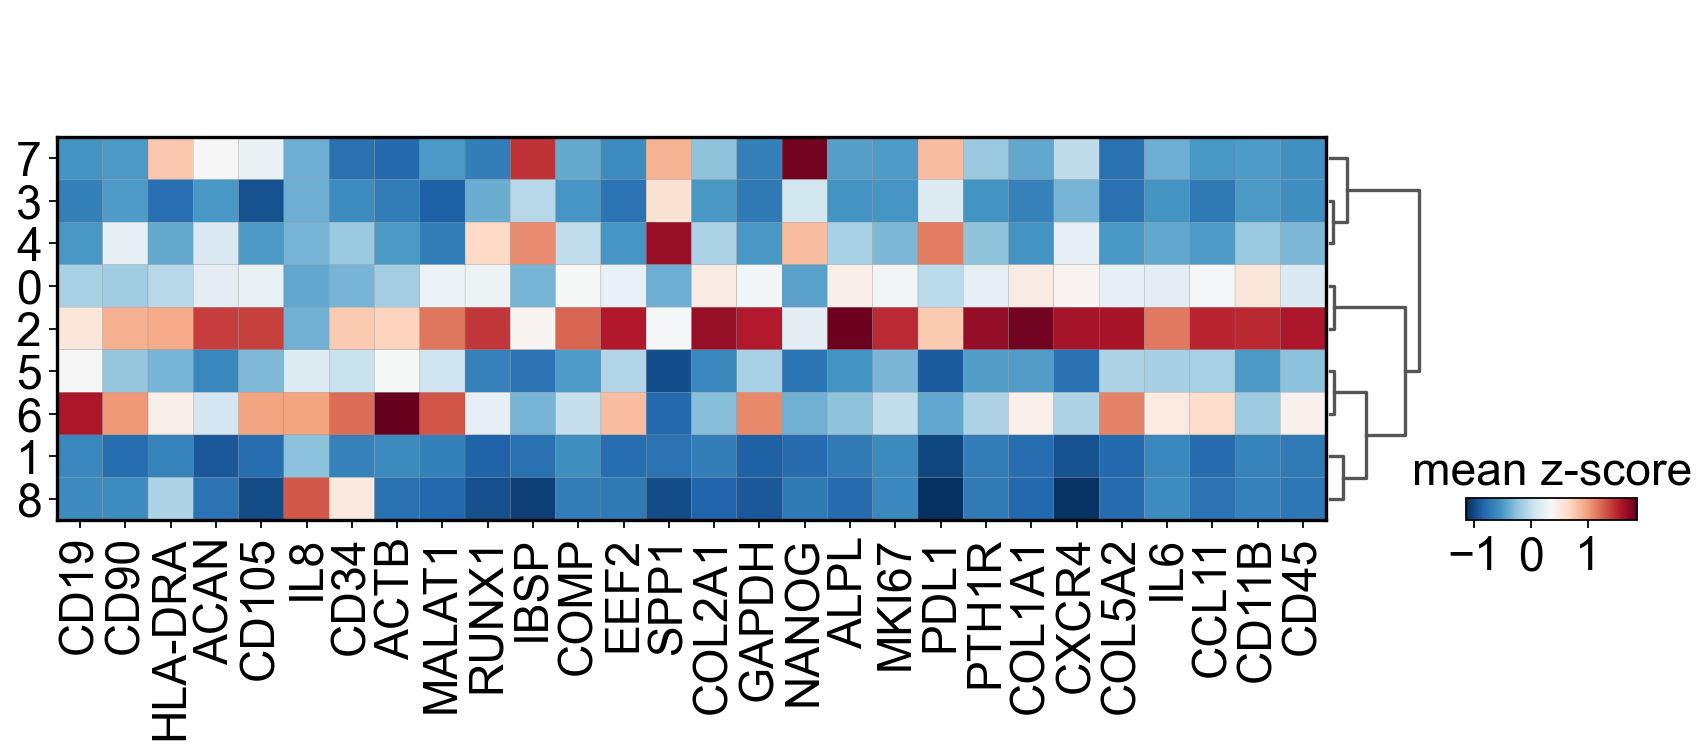

In [210]:
sc.pl.matrixplot(adata, adata.var_names.tolist(), 'leiden', dendrogram=True,
                 colorbar_title='mean z-score', cmap='RdBu_r')

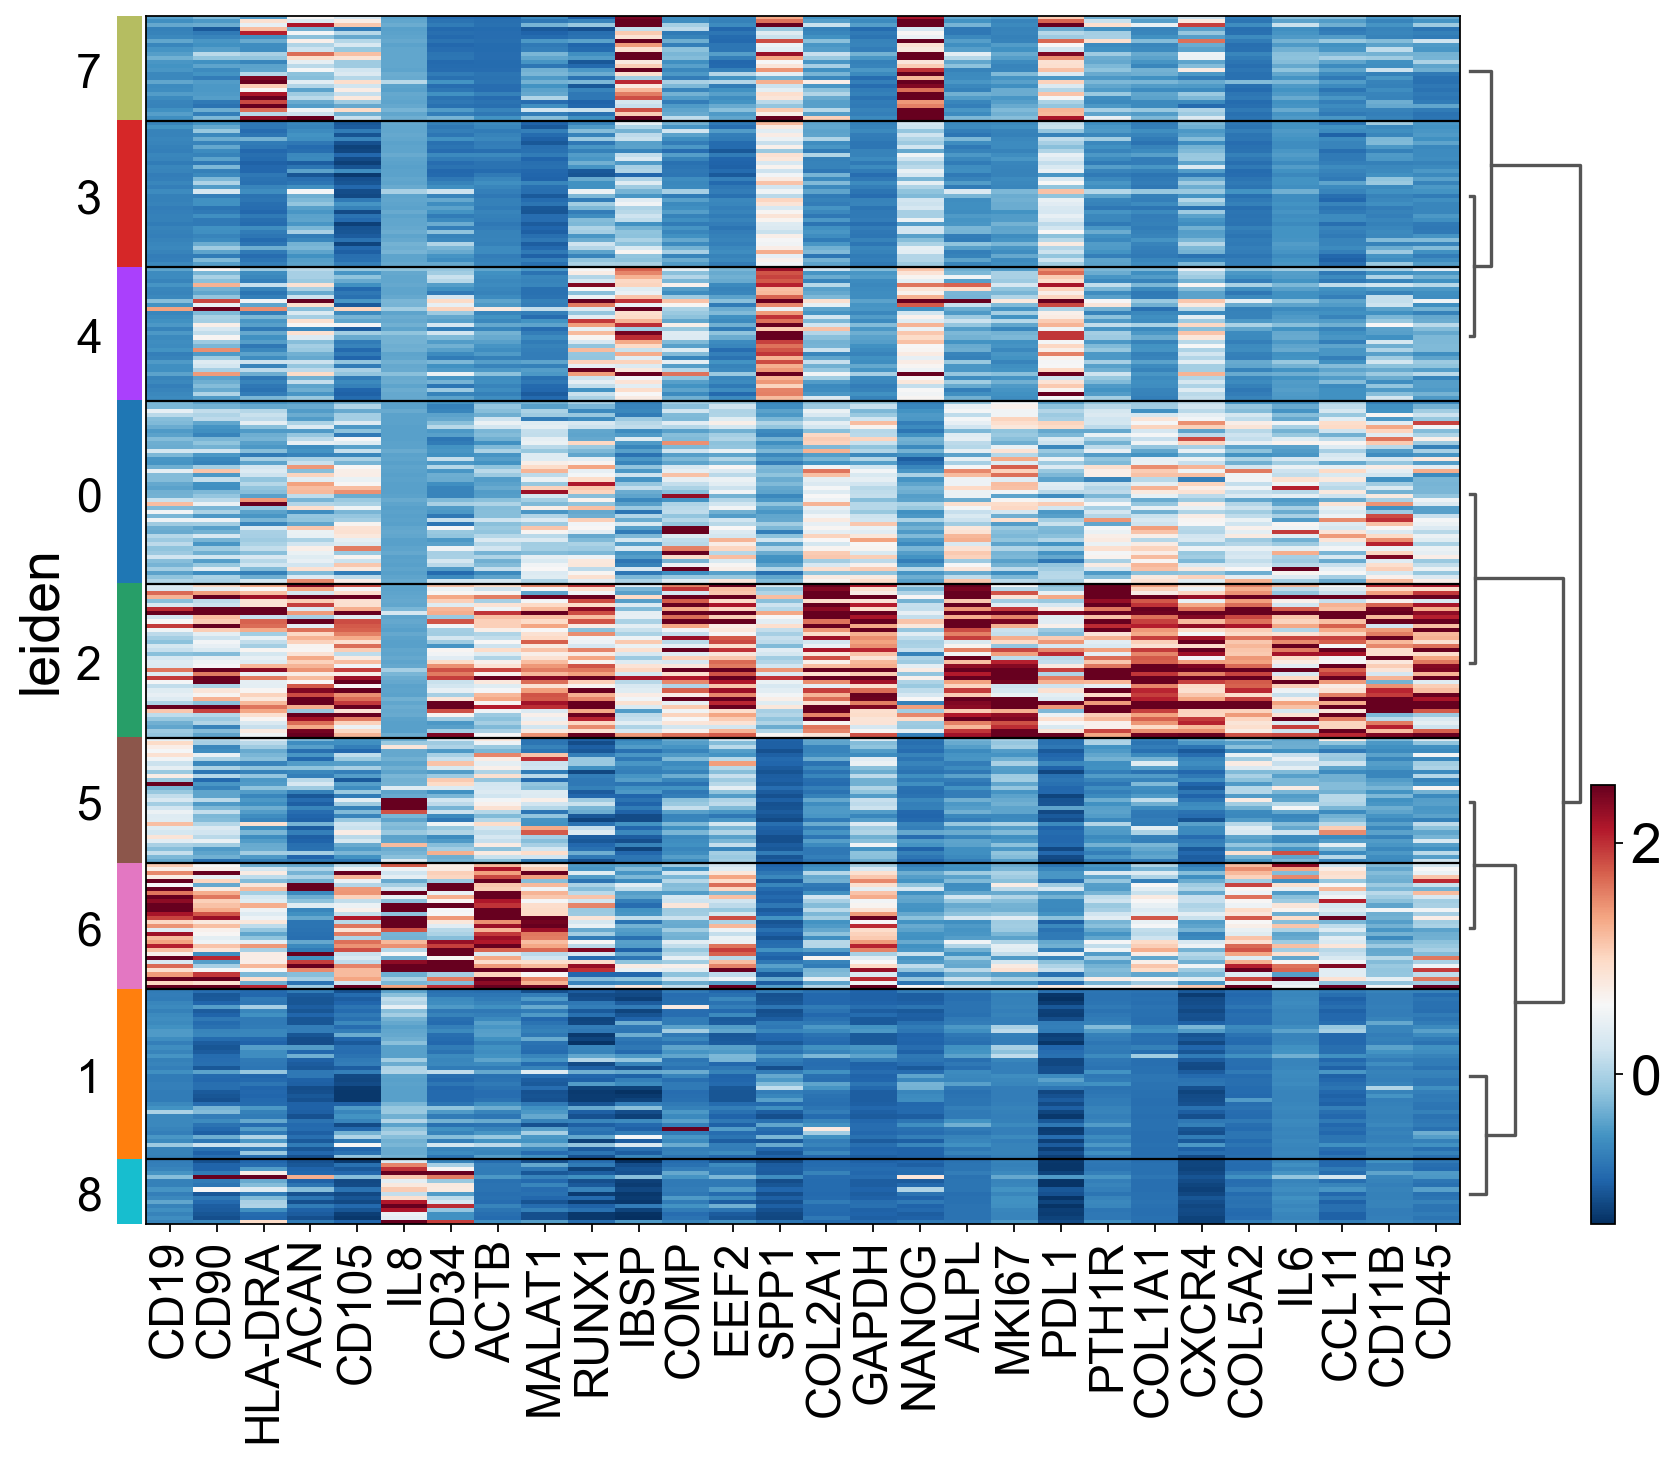

In [211]:
heatmap = sc.pl.heatmap(adata, adata.var_names.tolist(), 'leiden', dendrogram=True, cmap='RdBu_r', figsize=(12,10))

In [212]:
ntpm_adata.obs['leiden'] = adata.obs['leiden']
ntpm_adata.uns['leiden'] = adata.uns['leiden']
ntpm_adata.uns['leiden_colors'] = adata.uns['leiden_colors']
ntpm_adata.uns['dendrogram_leiden'] = adata.uns['dendrogram_leiden']

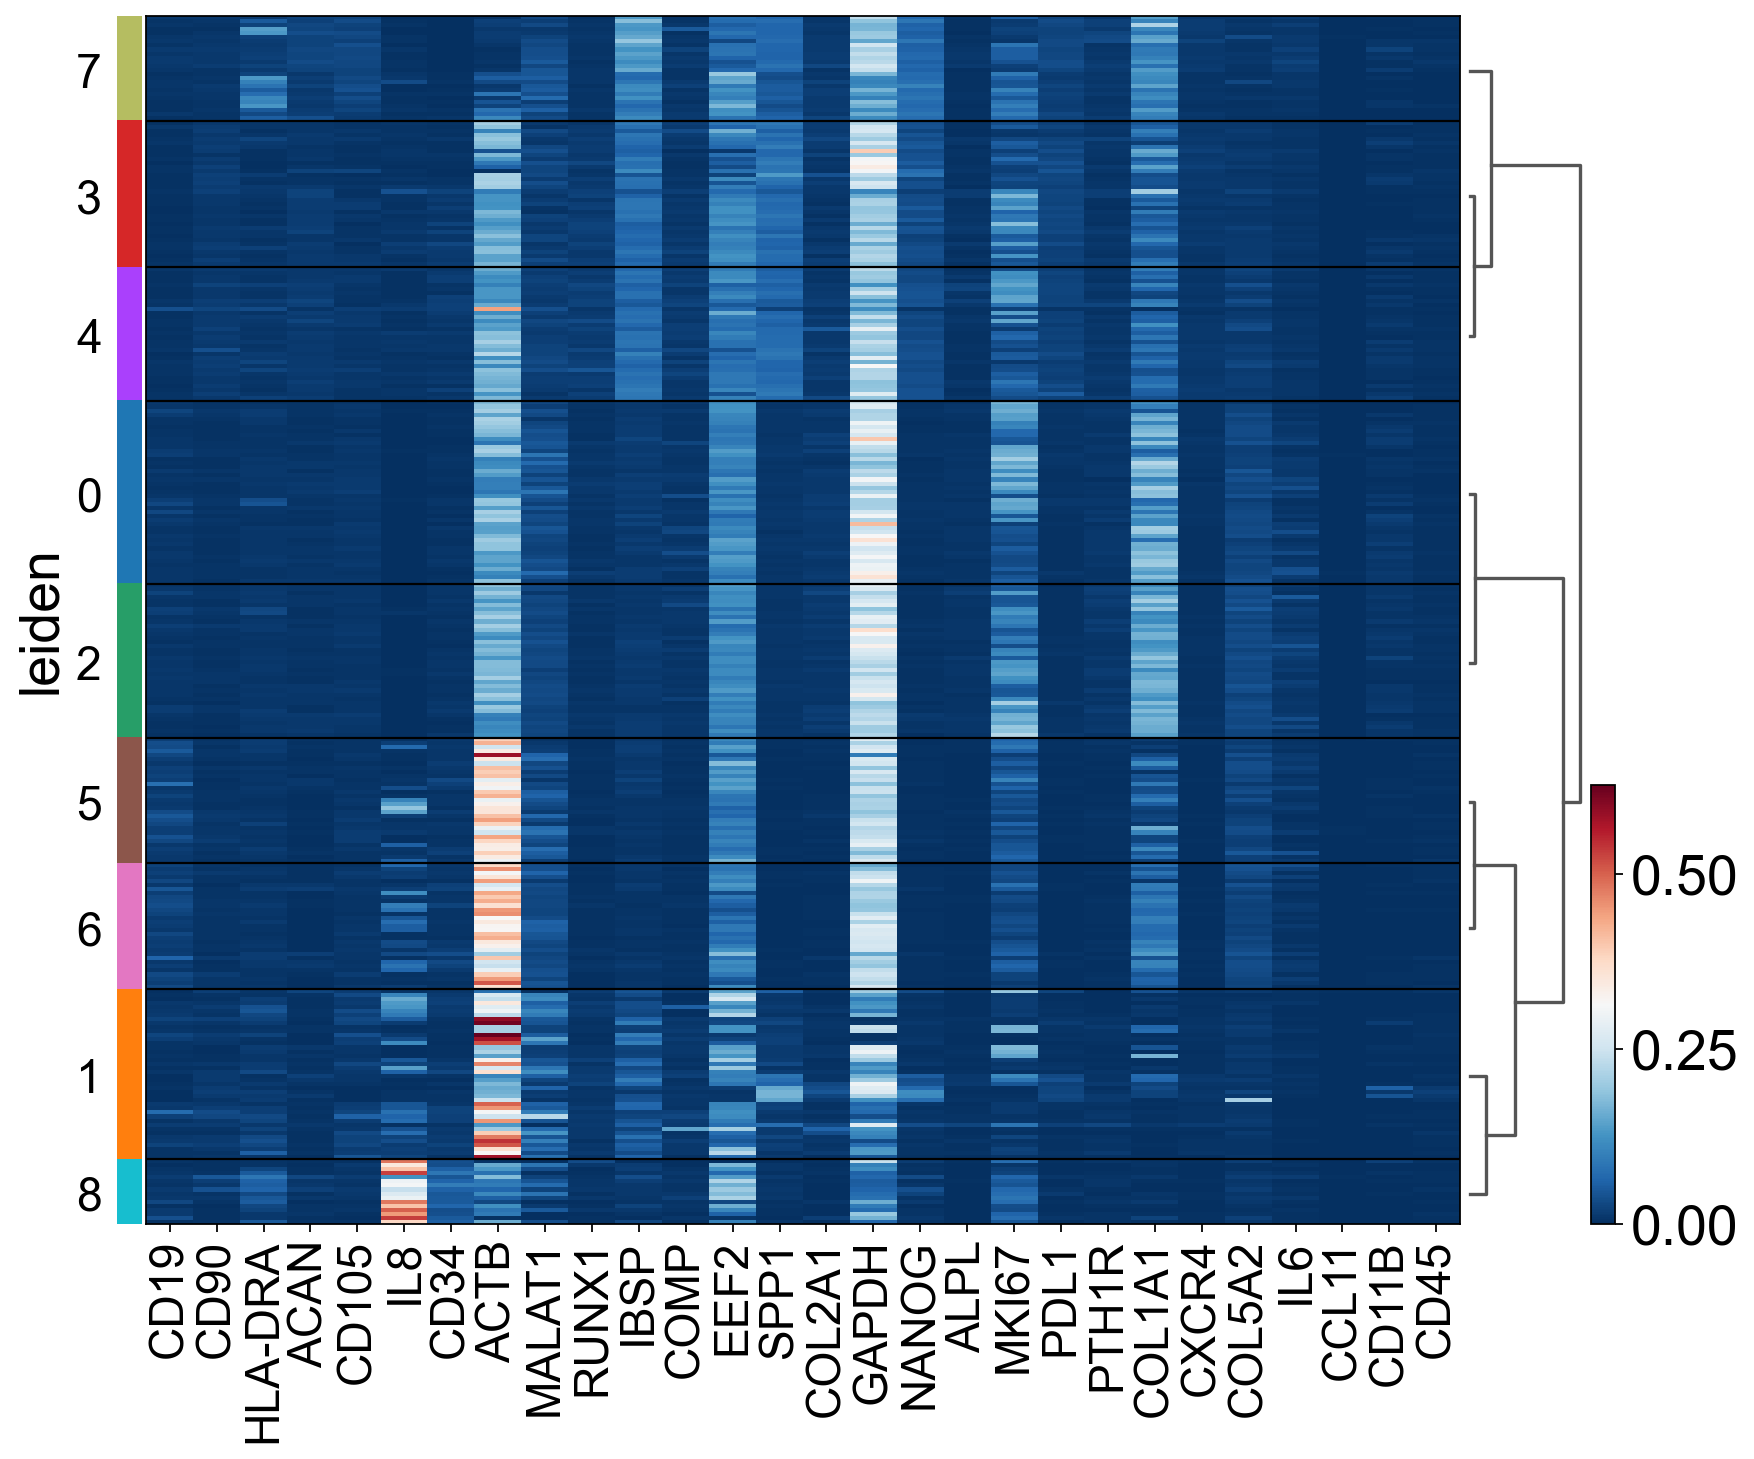

In [213]:
heatmap = sc.pl.heatmap(ntpm_adata, ntpm_adata.var_names.tolist(), 'leiden', dendrogram=True, cmap='RdBu_r', figsize=(12,10))

In [214]:
cell_types = pd.Categorical(['BM']*len(bm_cells['cell_ID'].tolist())+['UC']*len(uc_cells_subframe['cell_ID'].tolist()),
                            ordered=True, categories=['BM', 'UC'])
adata.obs['cell_groups'] = cell_types
adata.uns['cell_groups_colors'] = ['#0000ff', '#ff0000']

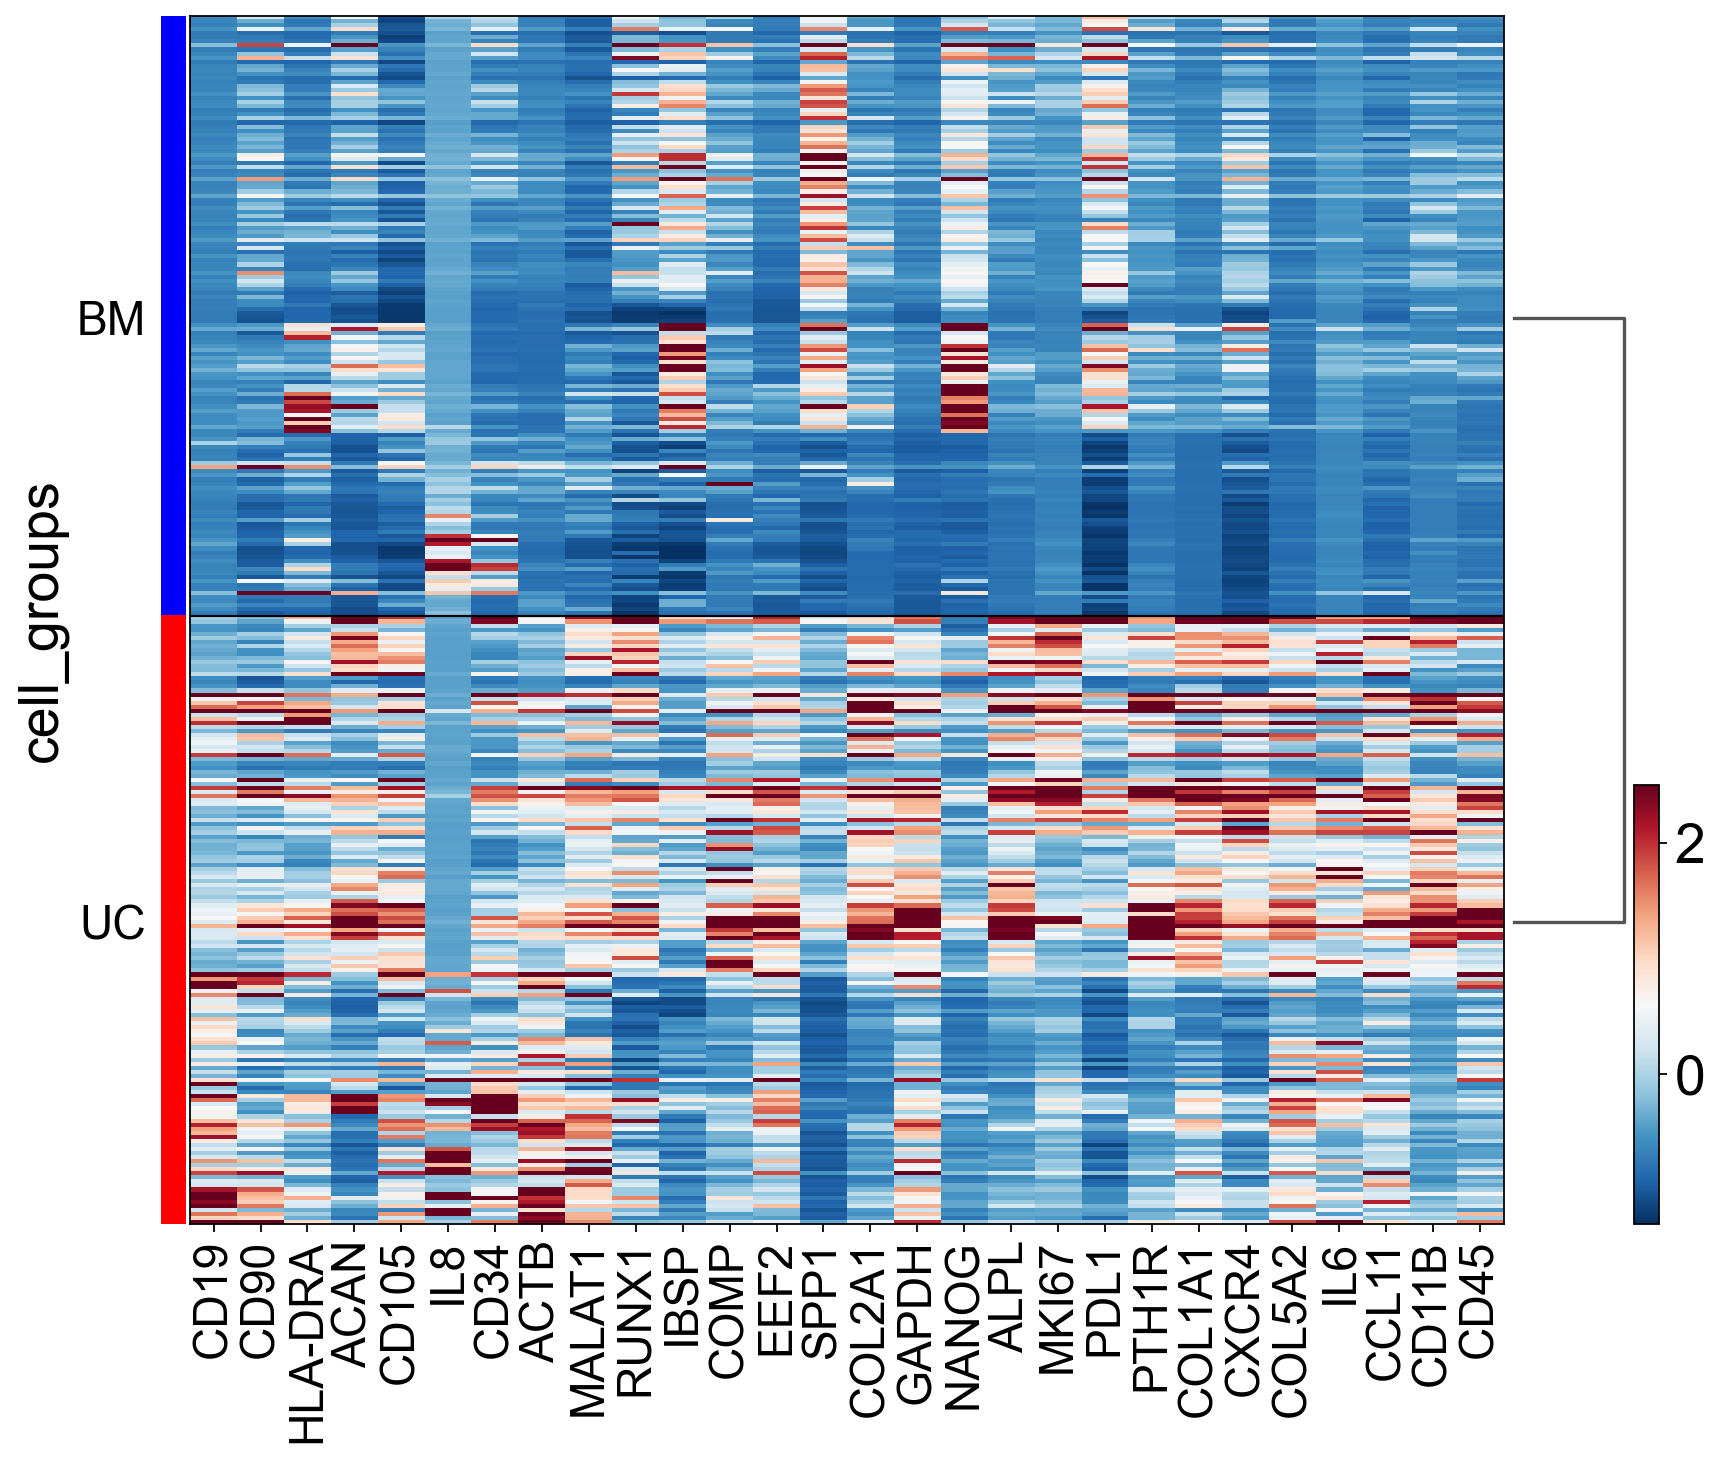

In [215]:
heatmap = sc.pl.heatmap(adata, adata.var_names.tolist(), 'cell_groups', var_group_labels='cell_groups', 
                        dendrogram=True, cmap='RdBu_r', figsize=(12,10))

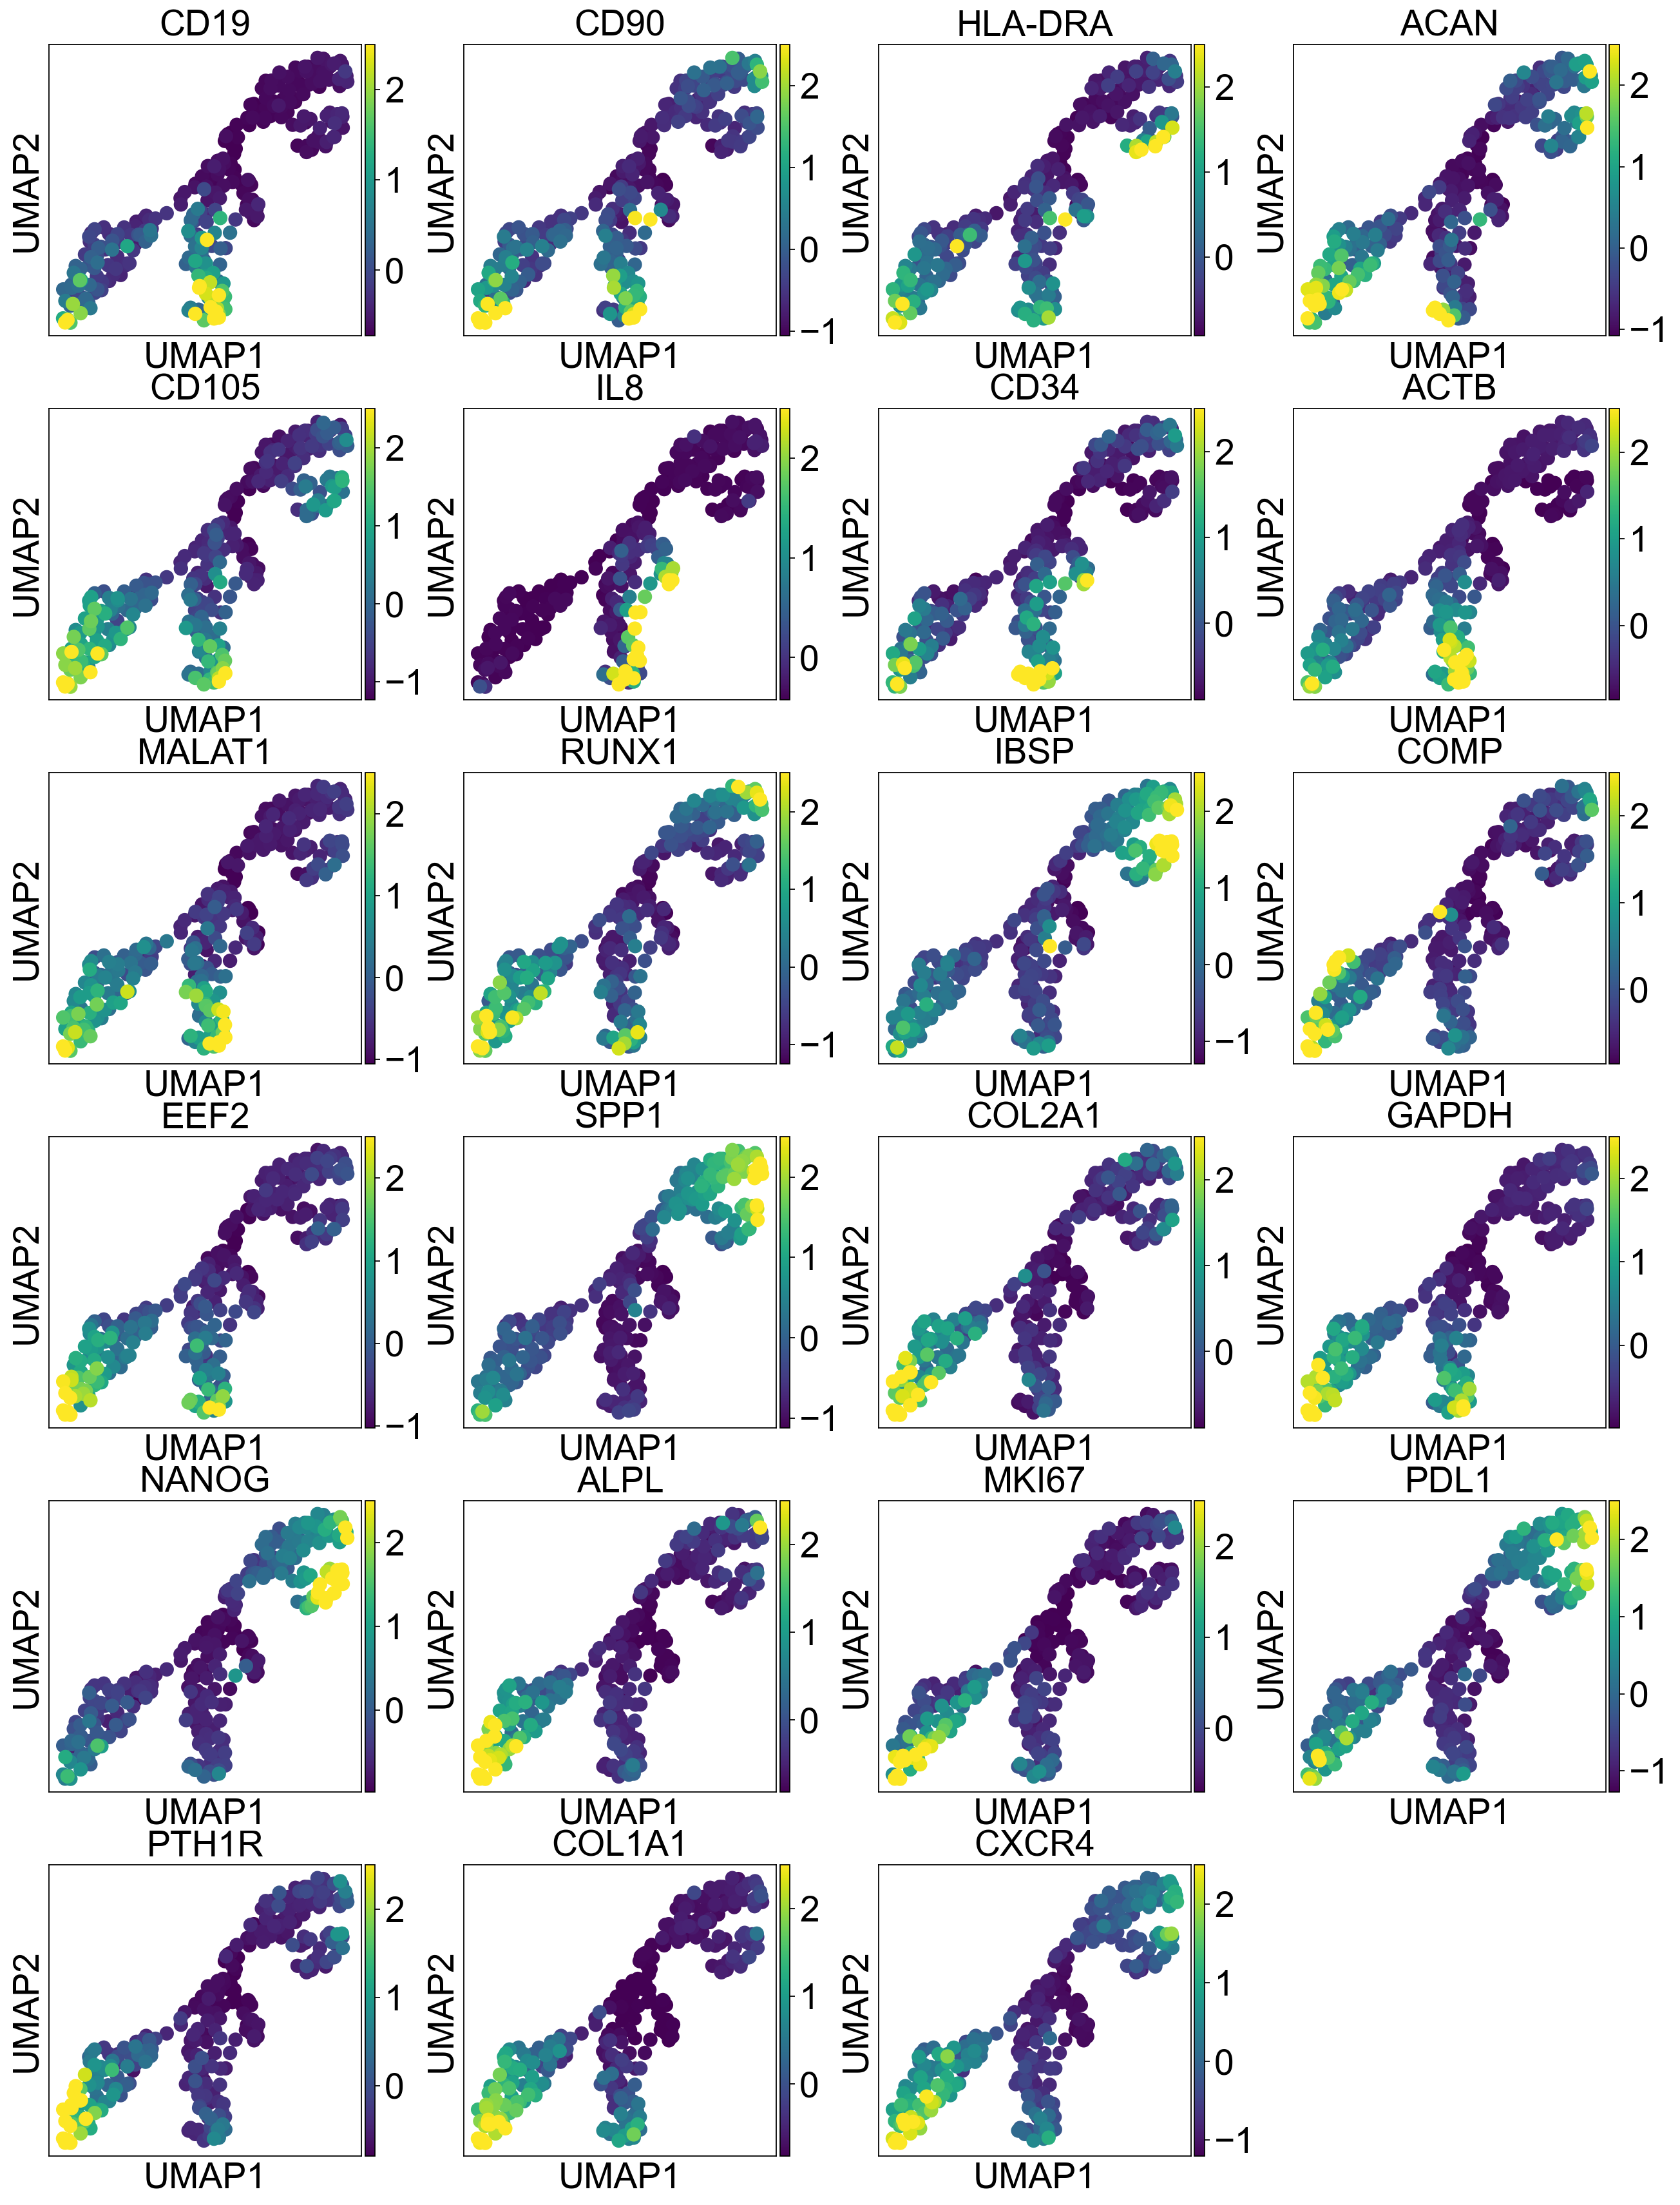

In [216]:
markers_list = ['CD19', 'CD90', 'HLA-DRA', 'ACAN', 'CD105', 'IL8', 'CD34', 'ACTB', 'MALAT1', 'RUNX1', 'IBSP', 'COMP', 'EEF2', 'SPP1', 'COL2A1', 'GAPDH', 'NANOG', 'ALPL', 'MKI67', 'PDL1', 'PTH1R', 'COL1A1', 'CXCR4']
sc.pl.umap(adata, color=markers_list)

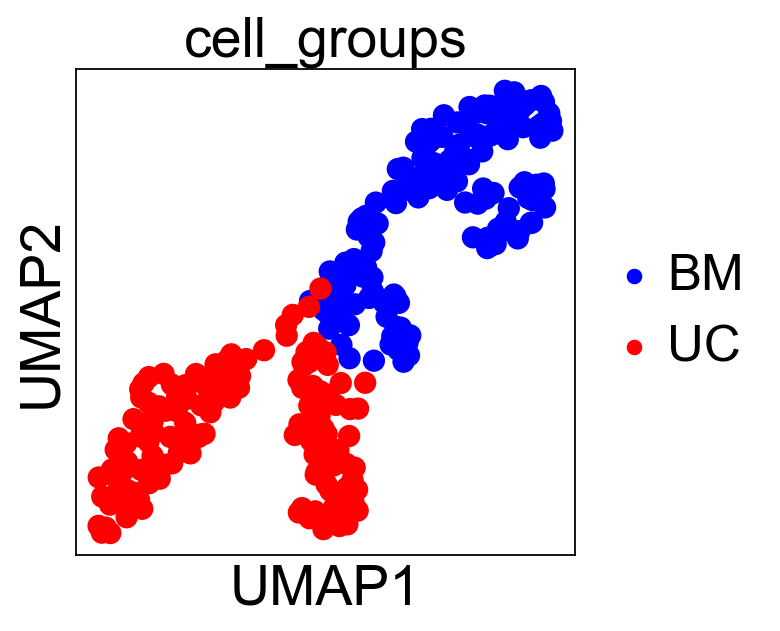

In [217]:
# Color UC/BM in umap
sc.pl.umap(adata, color=['cell_groups']) 

In [218]:
# uc_cells = pd.read_csv(os.path.join(in_dir, r'uc_abs_thre_expression.csv'))
# uc_cells_subframe = uc_cells.drop([104, 105, 106])
print(bm_cells.values.shape)
print(uc_cells.values.shape)

(148, 29)
(153, 29)


# Spatial plot at original cell positions

In [219]:
bm_pos = pd.read_csv('..\\00_expression_analysis\\bm_singlecell_position.csv').values
uc_pos = pd.read_csv('..\\00_expression_analysis\\uc_singlecell_position.csv').values

In [220]:
adata

AnnData object with n_obs × n_vars = 298 × 28
    obs: 'Cell', 'leiden', 'cell_groups'
    var: 'mean', 'std'
    uns: 'neighbors', 'umap', 'leiden', 'leiden_colors', 'dendrogram_leiden', 'cell_groups_colors', 'dendrogram_cell_groups'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [221]:
print(bm_pos.shape)
print(uc_pos.shape)

(148, 3)
(150, 3)


In [222]:
adata.obsm['spatial'] = np.concatenate((bm_pos, uc_pos))

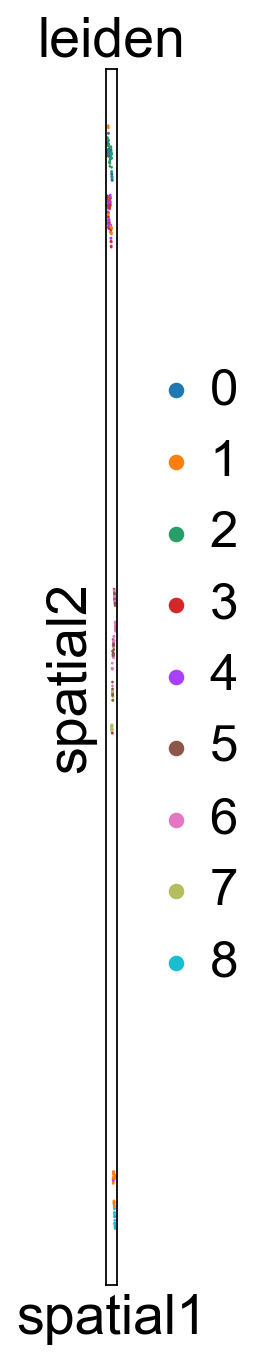

In [140]:
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.spatial(adata, color="leiden", spot_size=50)

In [ ]:
# Spatial plot of subset of 

In [223]:
# roi statistics
roi_frequency = []
ids = adata.obs['Cell'].tolist()
cluster = adata.obs['leiden'].tolist()
curr_roi = '000'
temp = np.zeros(9)
for i in range(len(ids)):
    roi = ids[i][:6]
    if roi == curr_roi:
        temp[int(cluster[i])] = temp[int(cluster[i])] + 1
    else:
        curr_roi = roi
        roi_frequency.append(temp)
        temp = np.zeros(9)
        temp[int(cluster[i])] = temp[int(cluster[i])] + 1

In [224]:
roi_arr = np.vstack(roi_frequency[1:])

In [225]:
roi_count = np.sum(roi_arr, axis=1).reshape(55,1)

In [226]:
np.min(roi_count)

2.0

In [227]:
roi_freq = roi_arr/roi_count

In [228]:
max_freq = np.max(roi_freq, axis=1)

In [229]:
np.min(max_freq)

0.42857142857142855

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


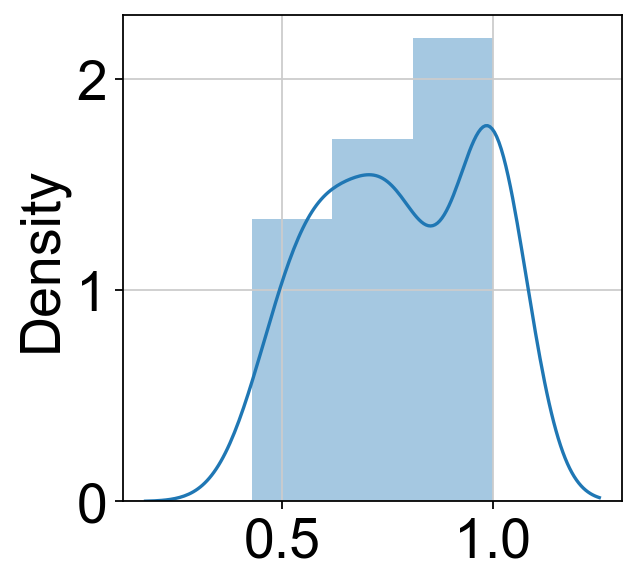

In [230]:
plot = sns.distplot(max_freq, kde=True)

In [198]:
fig = plot.get_figure()
fig.savefig('roi density.png')

In [231]:
298/55

5.418181818181818

In [239]:
# Lineage specific marker in each cluster
osteogenic = ['ALPL', 'SPP1']
chondrogenic = ['IBSP', 'ACAN', 'COMP']

In [240]:
# separate cells by cluster
adata

AnnData object with n_obs × n_vars = 298 × 28
    obs: 'Cell', 'leiden', 'cell_groups'
    var: 'mean', 'std'
    uns: 'neighbors', 'umap', 'leiden', 'leiden_colors', 'dendrogram_leiden', 'cell_groups_colors', 'dendrogram_cell_groups'
    obsm: 'X_umap', 'spatial'
    obsp: 'distances', 'connectivities'

In [249]:
cluster_labels = adata.obs['leiden'].tolist()
gene_name = adata.var_names.values.tolist()

In [261]:
data_x = [[],[],[],[],[],[],[],[],[]]
for i in range(len(cluster_labels)):
    label = int(cluster_labels[i])
    data_x[label].append(raw_adata.X[i,:])

In [262]:
for i in range(len(data_x)):
    data_x[i] = np.vstack(data_x[i])

In [263]:
osteo_index = []
for gene in osteogenic:
    osteo_index.append(gene_name.index(gene))
chondro_index = []
for gene in chondrogenic:
    chondro_index.append(gene_name.index(gene))

In [264]:
lineage_data = []
for item in data_x:
    lineage_data.append(np.dstack((item[:,osteo_index[0]], item[:,osteo_index[1]], item[:,chondro_index[0]], item[:,chondro_index[1]], item[:,chondro_index[2]])))

In [265]:
lineage_genes = osteogenic + chondrogenic
x_pos = np.arange(len(lineage_genes))

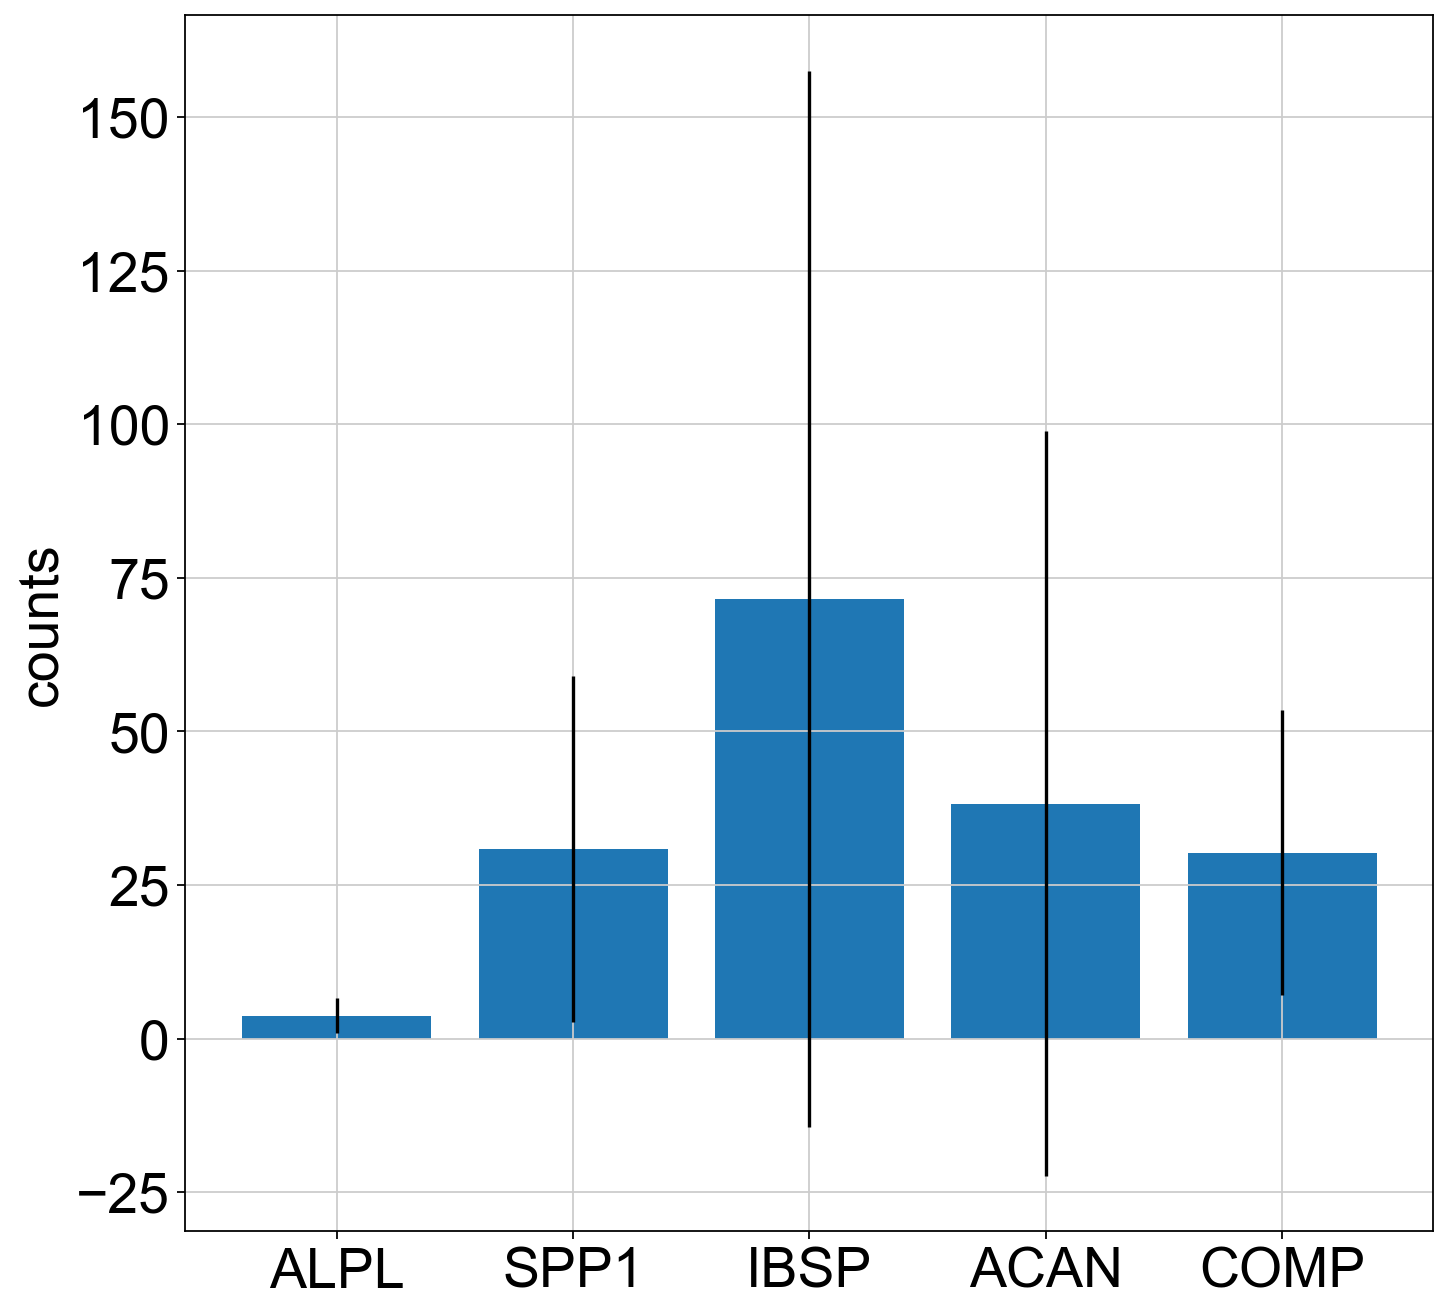

In [296]:
plt.rcParams["figure.figsize"] = (10,10)
fig,ax = plt.subplots()
ax.bar(x_pos, height=np.mean(lineage_data[8], axis=1).flatten().tolist(), yerr=np.std(lineage_data[8], axis=1).flatten().tolist())
ax.set_xticks(x_pos)
ax.set_xticklabels(lineage_genes)
ax.set_ylabel('counts')
plt.savefig('cluster8_osteo v. chondro.png')

In [273]:
np.mean(lineage_data[0],axis=1).flatten()

array([133.8    , 158.75555, 276.4    , 140.57777, 210.42223],
      dtype=float32)

In [22]:
sc.tl.rank_genes_groups(adata, groupby='leiden')

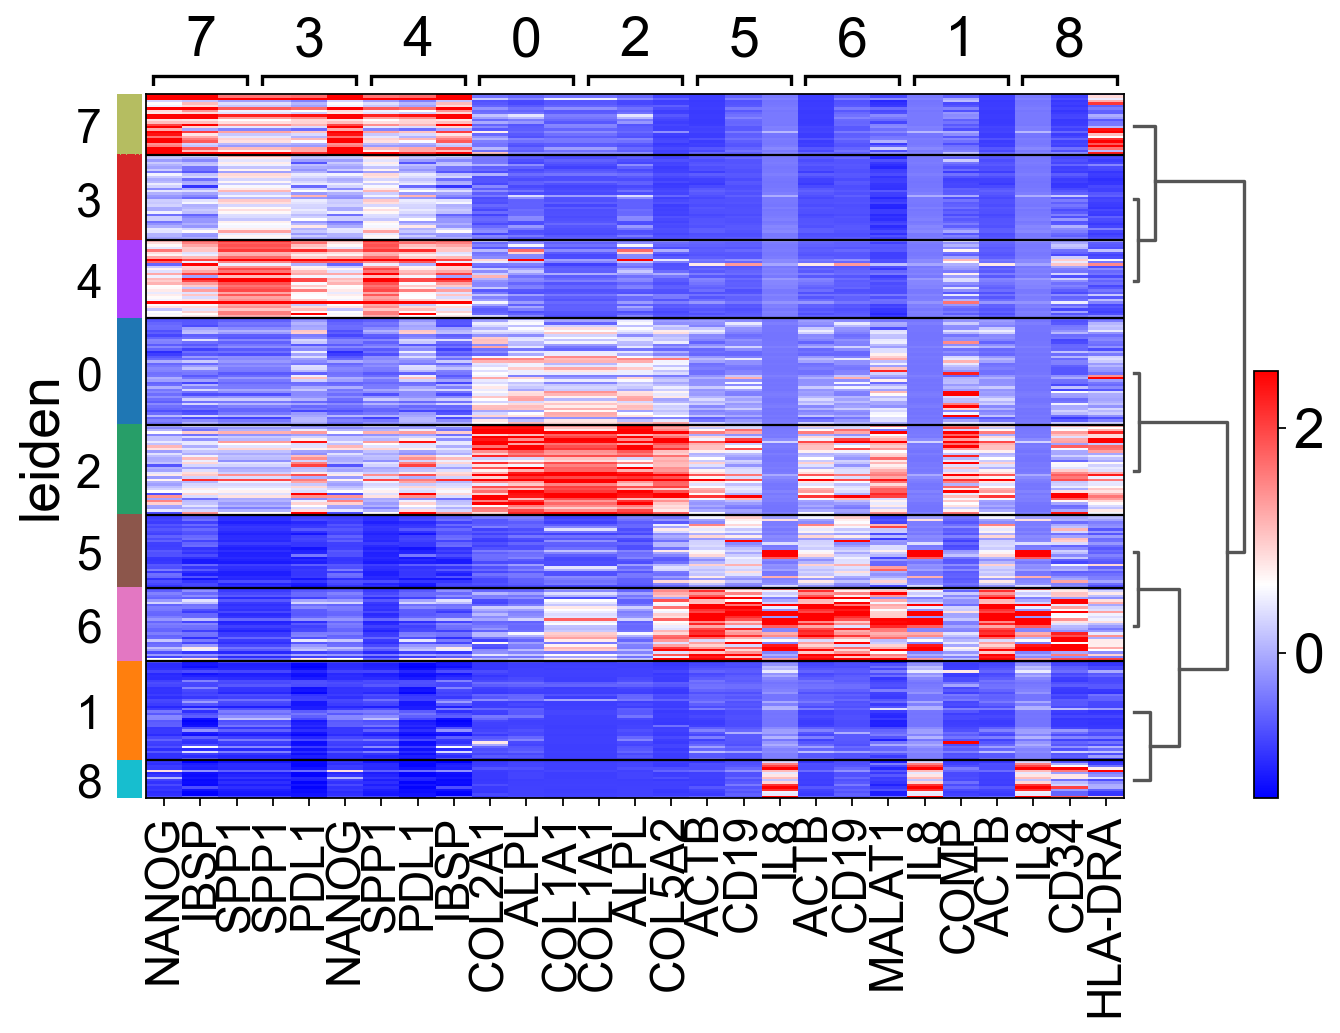

In [29]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, cmap='bwr')

In [35]:
bm_cells.columns.tolist()[1:]

['CD19',
 'CD90',
 'HLA-DRA',
 'ACAN',
 'CD105',
 'IL8',
 'CD34',
 'ACTB',
 'MALAT1',
 'RUNX1',
 'IBSP',
 'COMP',
 'EEF2',
 'SPP1',
 'COL2A1',
 'GAPDH',
 'NANOG',
 'ALPL',
 'MKI67',
 'PDL1',
 'PTH1R',
 'COL1A1',
 'CXCR4',
 'COL5A2',
 'IL6',
 'CCL11',
 'CD11B',
 'CD45']

In [62]:
adata

AnnData object with n_obs × n_vars = 298 × 28
    obs: 'Cell', 'leiden', 'cell_groups'
    var: 'mean', 'std'
    uns: 'neighbors', 'umap', 'leiden', 'leiden_colors', 'dendrogram_leiden', 'cell_groups_colors', 'dendrogram_cell_groups', 'rank_genes_groups'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [50]:
data = (np.concatenate((bm_cells.values[:,1:], uc_cells_subframe.values[:,1:]))).astype('float')
labels = adata.obs['leiden'].tolist()
colors = adata.uns['leiden_colors']
color_l = []
for i in range(len(labels)):
    color_l.append(colors[int(labels[i])])

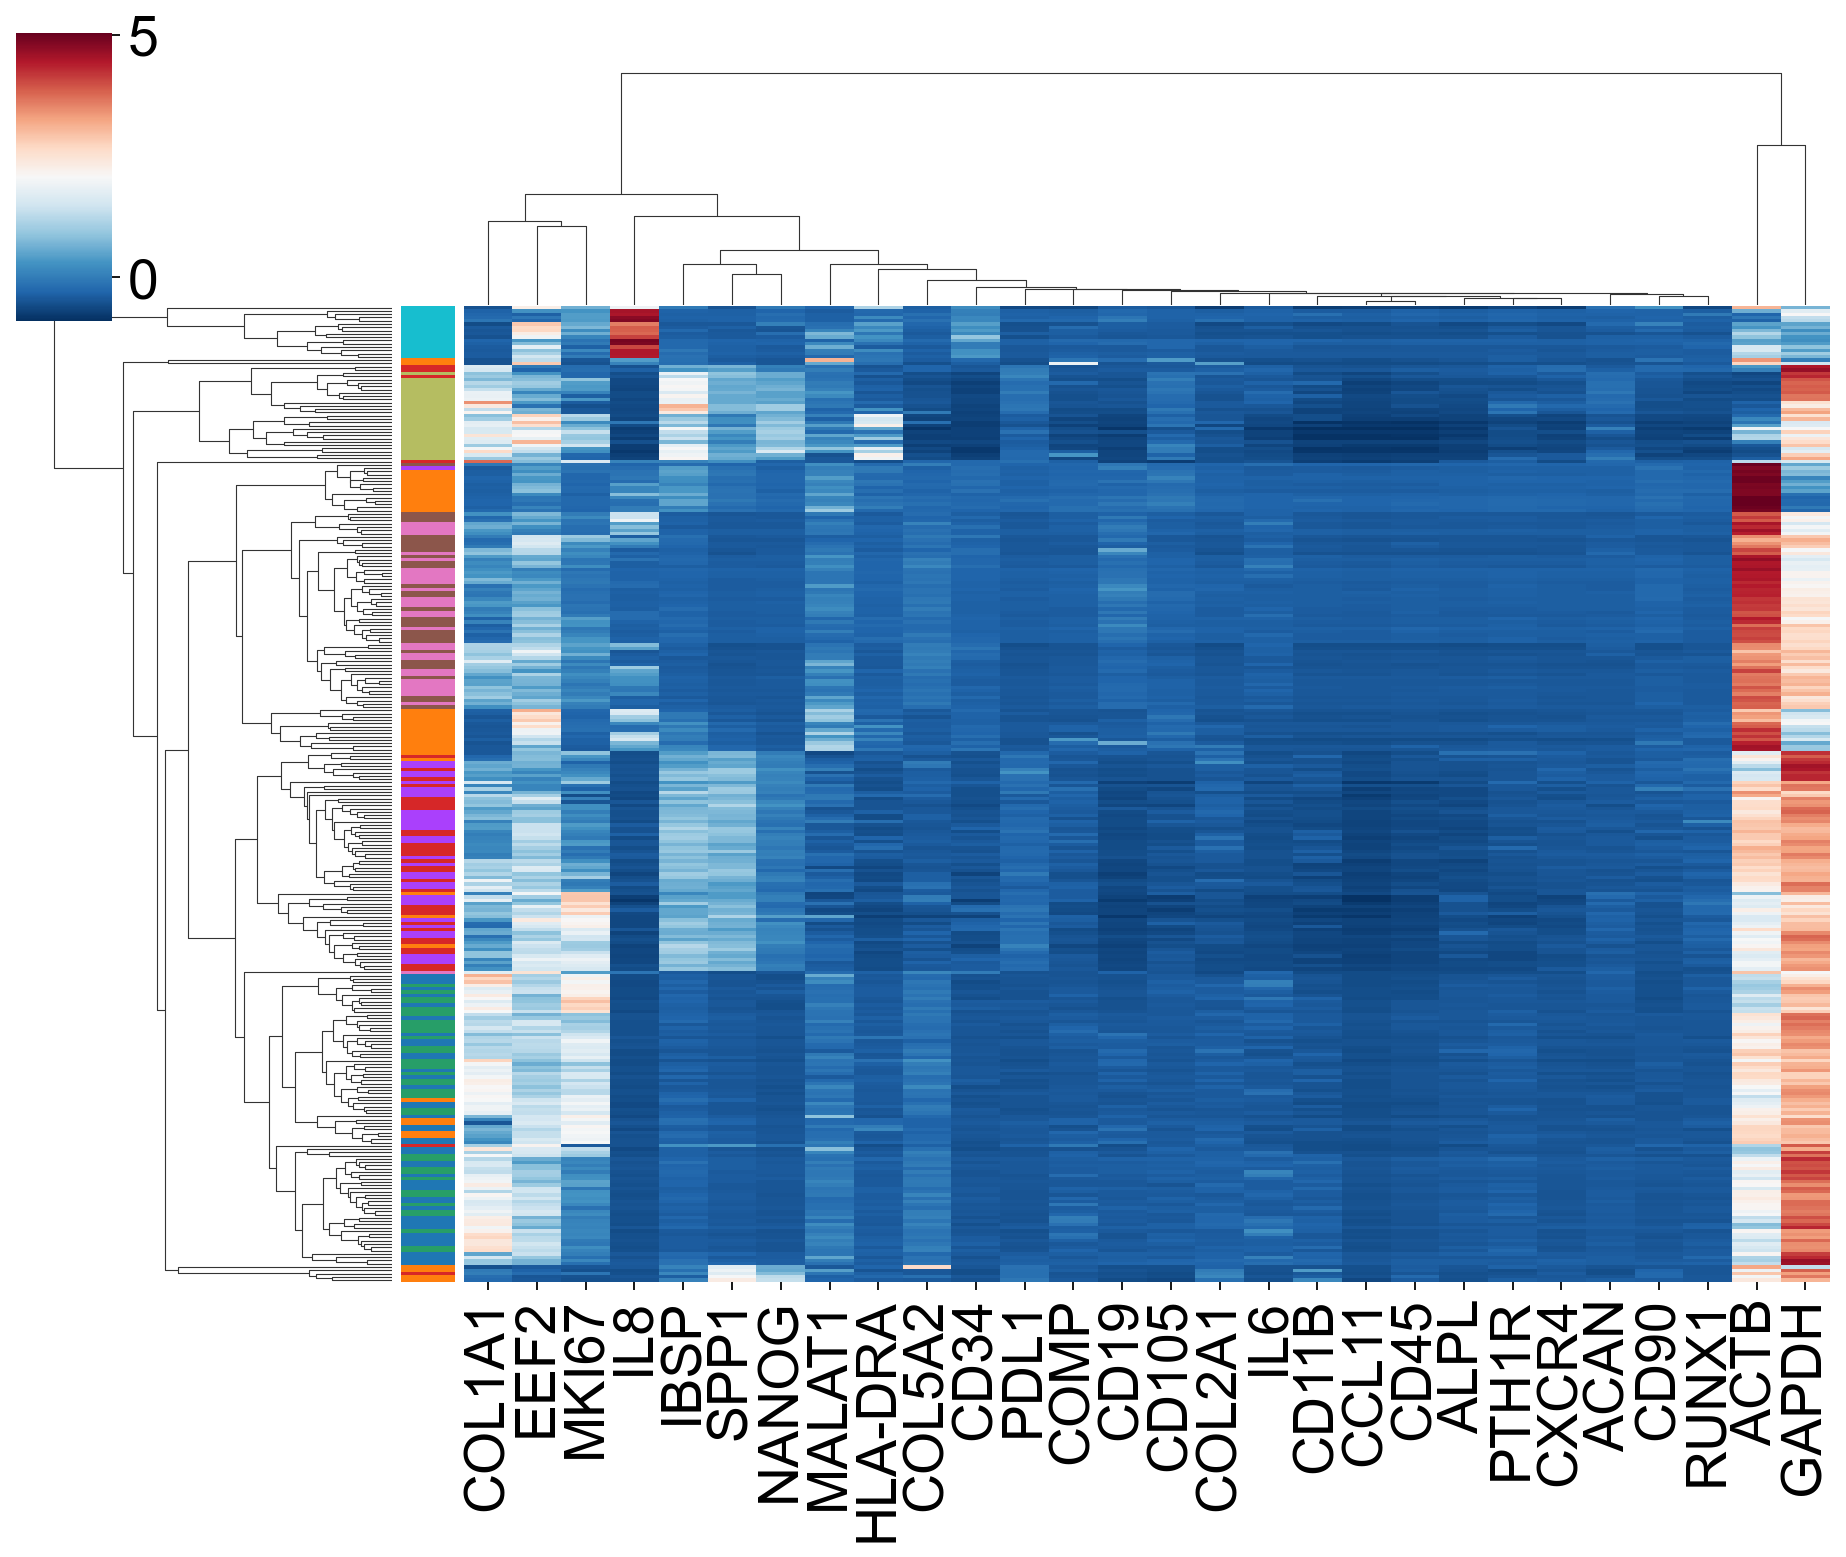

In [99]:
sns.clustermap(data, cmap='RdBu_r', xticklabels = bm_cells.columns.tolist()[1:], yticklabels=False,
               z_score='column', row_colors=color_l, figsize=(12,10))

In [ ]:
# MSC criteria markers clustering

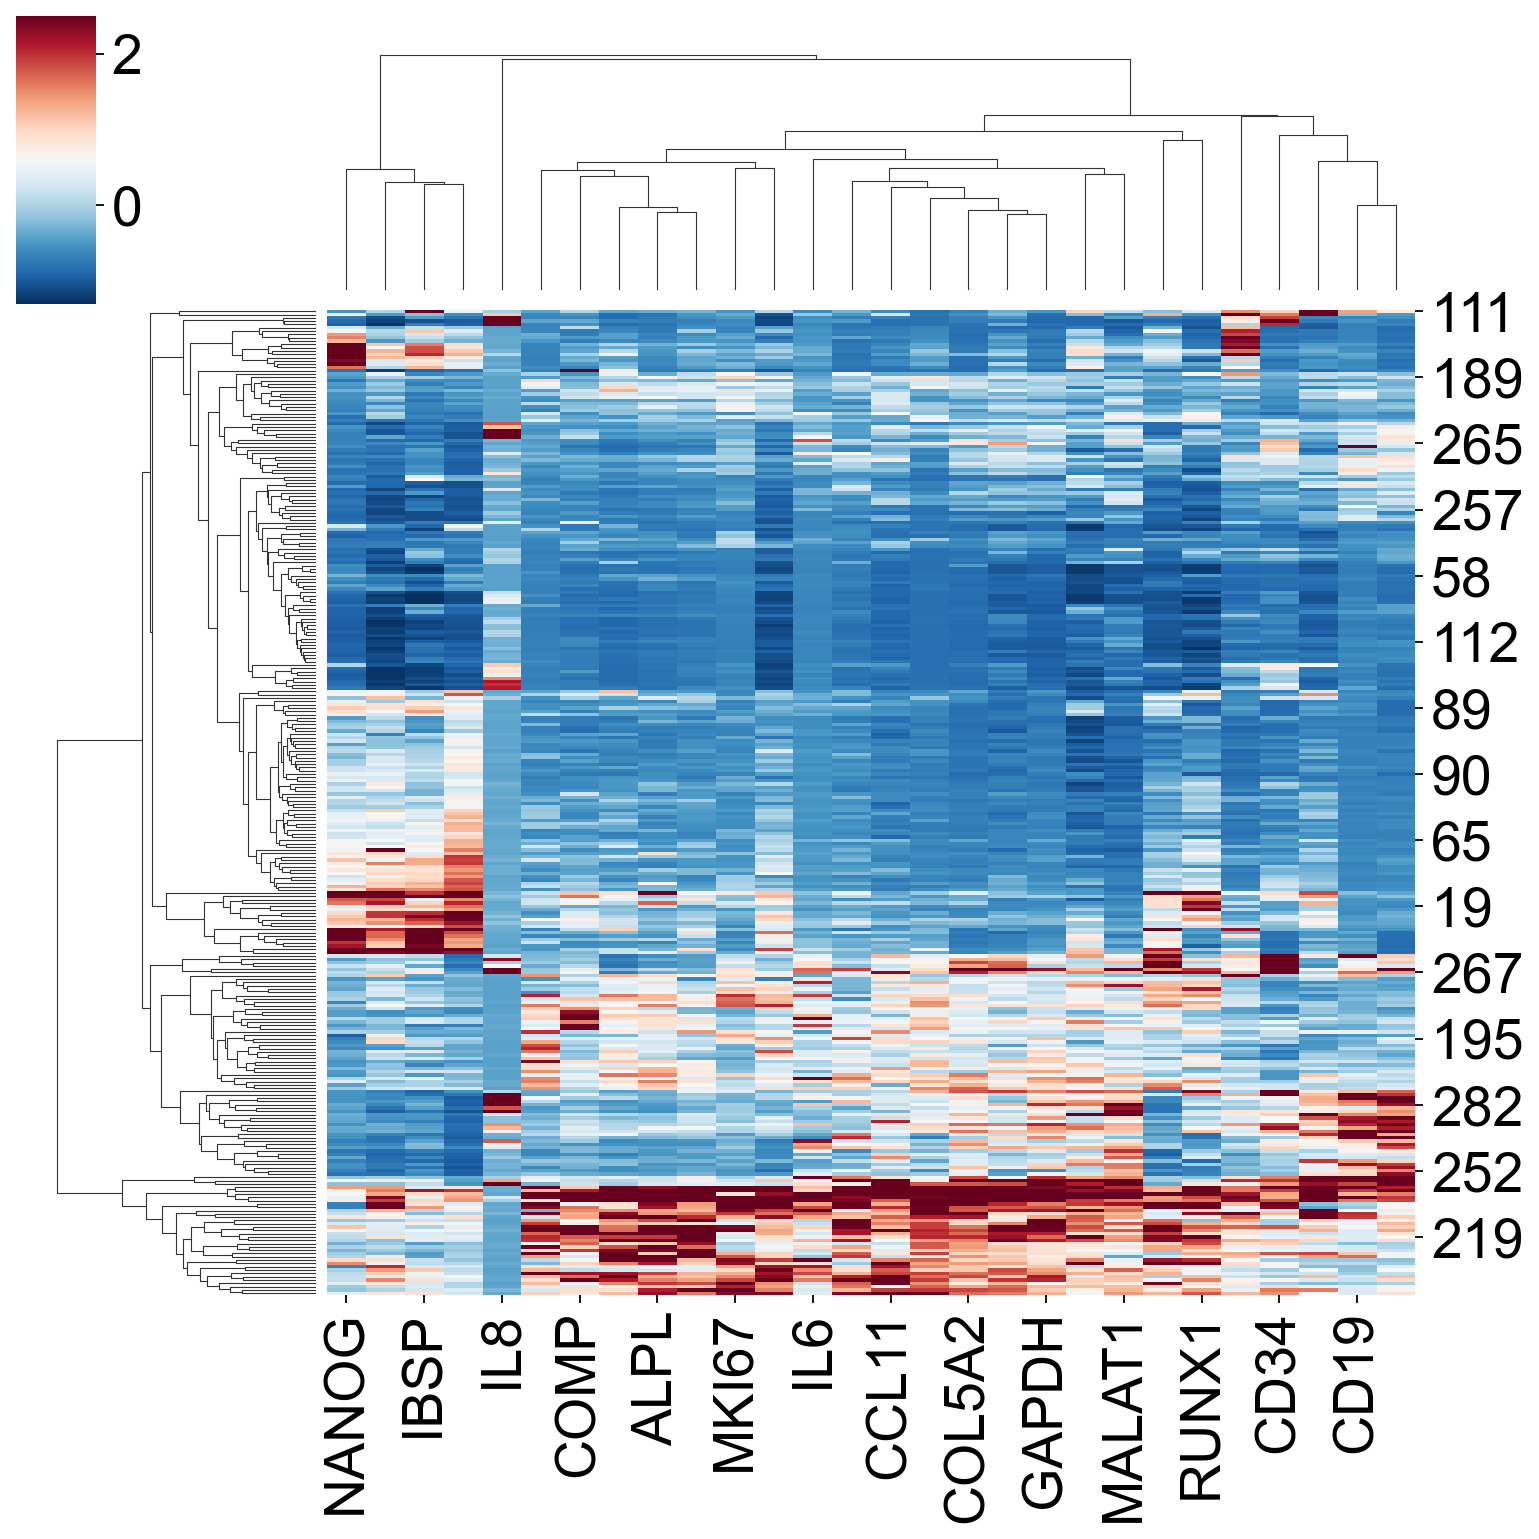

In [66]:
sc.pl.clustermap(adata, cmap='RdBu_r')

In [75]:
# Load and color cells
import skimage.io as io
from tqdm import tqdm

In [76]:
colors = adata.uns['leiden_colors']
colors_rgb = []
for color in colors:
    colors_rgb.append(matplotlib.colors.hex2color(color))
colors_rgb = np.array(colors_rgb)*255
colors_rgb = colors_rgb.astype(np.uint8)
# print(colors_rgb)

In [117]:
im_in_dir = r'..\\00_registered\\uc\\28_genes'
fn_l = os.listdir(im_in_dir)
fn_l.sort()

In [118]:
im_mask_l = []
roi = []
for fn in tqdm(fn_l):
    l = os.listdir(os.path.join(im_in_dir, fn))
    temp = tifffile.imread(os.path.join(im_in_dir, fn, l[0]))
    im_mask = np.zeros((temp.shape[0], temp.shape[1]), 'uint8')
    i = 1
    for n in l:
        if n.startswith('cell'):
            mask = tifffile.imread(os.path.join(im_in_dir, fn, n))
            mask = mask.reshape(mask.shape[0], mask.shape[1])
            im_mask = np.where(mask>0, i, im_mask)
            i = i + 1
    im_mask_l.append(im_mask)
    roi.append(fn)

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:10<00:00,  3.48it/s]


In [119]:
# remove roi 034 due to runx1 count
idx = roi.index('034')
roi.pop(idx)
im_mask_l.pop(idx)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [120]:
ids = adata.obs['Cell'].tolist()
labels = adata.obs['leiden'].tolist()

In [123]:
new_im = []
roi_remove = []
for k in tqdm(range(len(im_mask_l))):
    im = im_mask_l[k]
    r = roi[k]
    if np.max(im) > 0:
        new_im_temp = np.zeros((im.shape[0], im.shape[1], 3), 'uint8')
        for i in range(1, np.max(im)+1):
            idx = ids.index('uc_'+r+'_'+str(i))
            label = int(labels[idx])
            new_im_temp[im == i, 0] = colors_rgb[label, 0]
            new_im_temp[im == i, 1] = colors_rgb[label, 1]
            new_im_temp[im == i, 2] = colors_rgb[label, 2]
        new_im.append(new_im_temp)
    else:
        roi_remove.append(r)

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.36it/s]


In [124]:
for remove in roi_remove:
    roi.remove(remove)

In [126]:
im_out_dir = r'..\\00_registered\\uc\\28_gene_colors'
for i in range(len(roi)):
    r = roi[i]
    io.imsave(os.path.join(im_out_dir, r+'.png'), new_im[i])

In [183]:
# Cluster functional genes only, eliminate gapdh, actb, eef2, malat1
bm_subframe = bm_cells.drop(columns=['GAPDH', 'ACTB', 'EEF2', 'MALAT1'])
uc_subframe = uc_cells_subframe.drop(columns=['GAPDH', 'ACTB', 'EEF2', 'MALAT1'])

In [186]:
dropped_adata = sc.AnnData(np.concatenate((bm_subframe.values[:,1:], uc_subframe.values[:,1:])))
dropped_adata.var_names = bm_subframe.columns.tolist()[1:]
dropped_adata.obs['Cell'] = bm_subframe['cell_ID'].tolist()+uc_subframe['cell_ID'].tolist()

In [194]:
sc.pp.scale(dropped_adata, max_value=2.5)

In [195]:
sc.pp.neighbors(dropped_adata)
sc.tl.umap(dropped_adata)

In [196]:
sc.tl.leiden(dropped_adata, resolution=1)

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Cell' as categorical


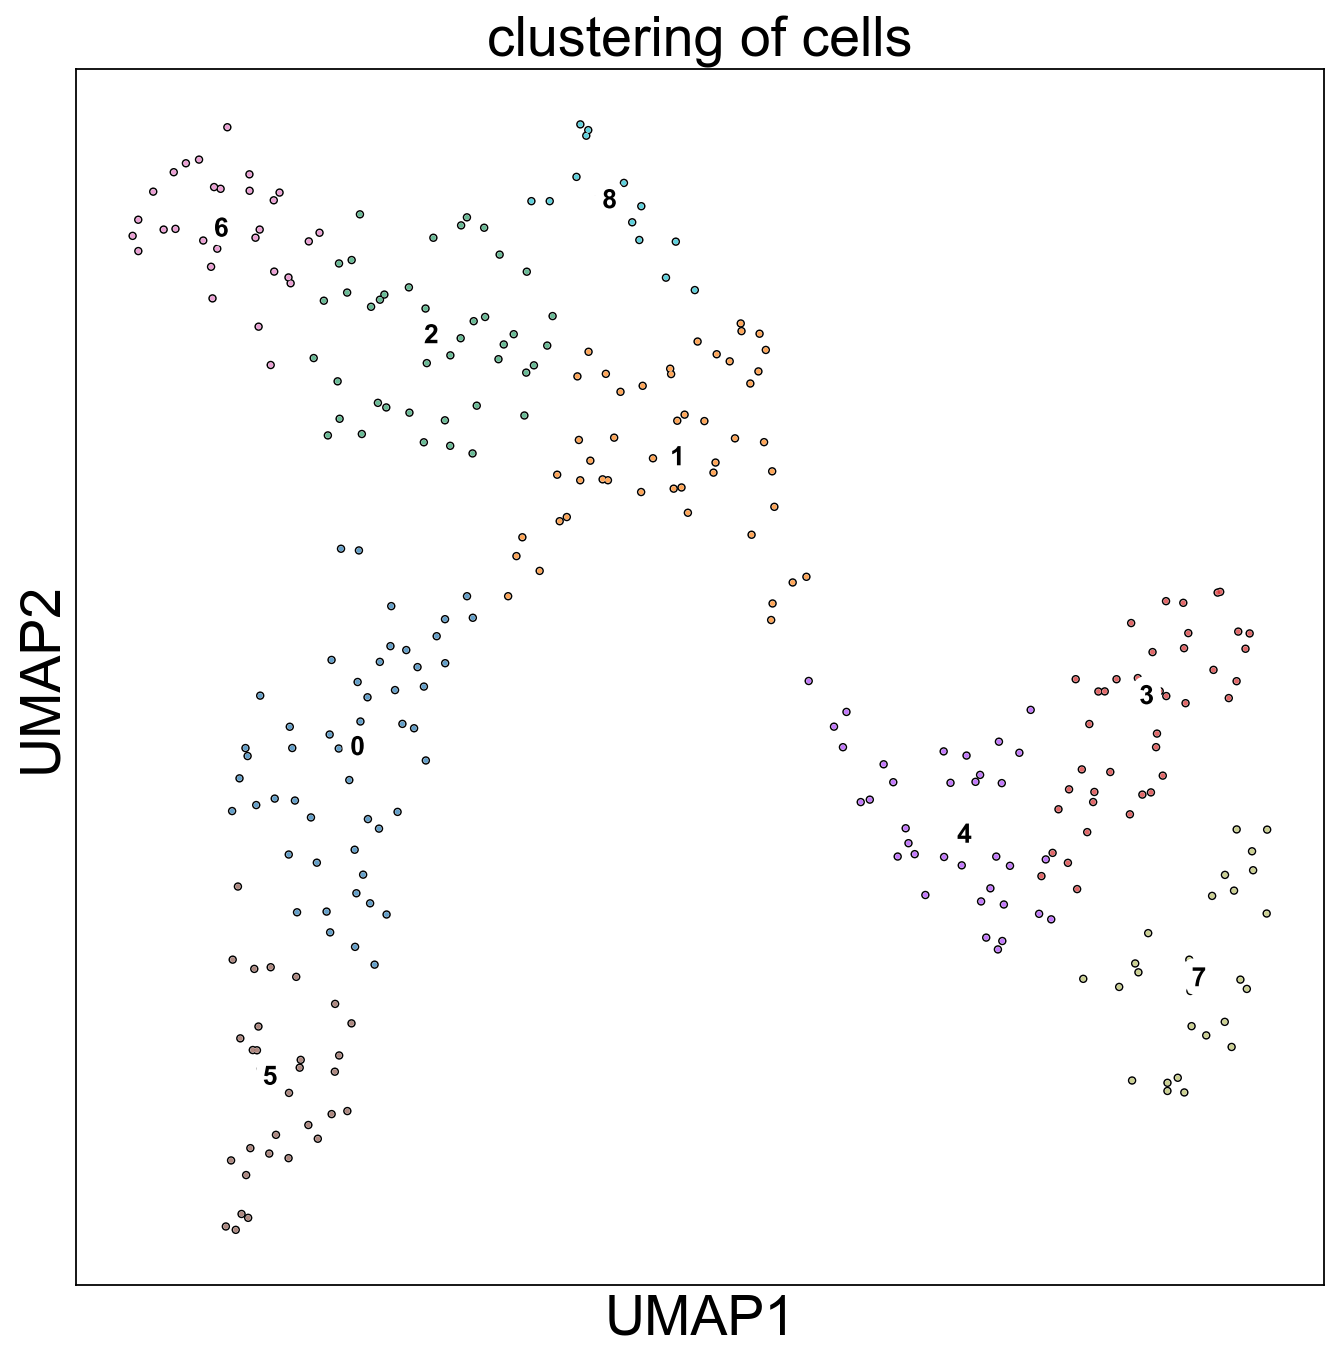

In [197]:
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(dropped_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=12, legend_fontoutline=8, 
               frameon=True,  title='clustering of cells', save=' reduced genes.png')

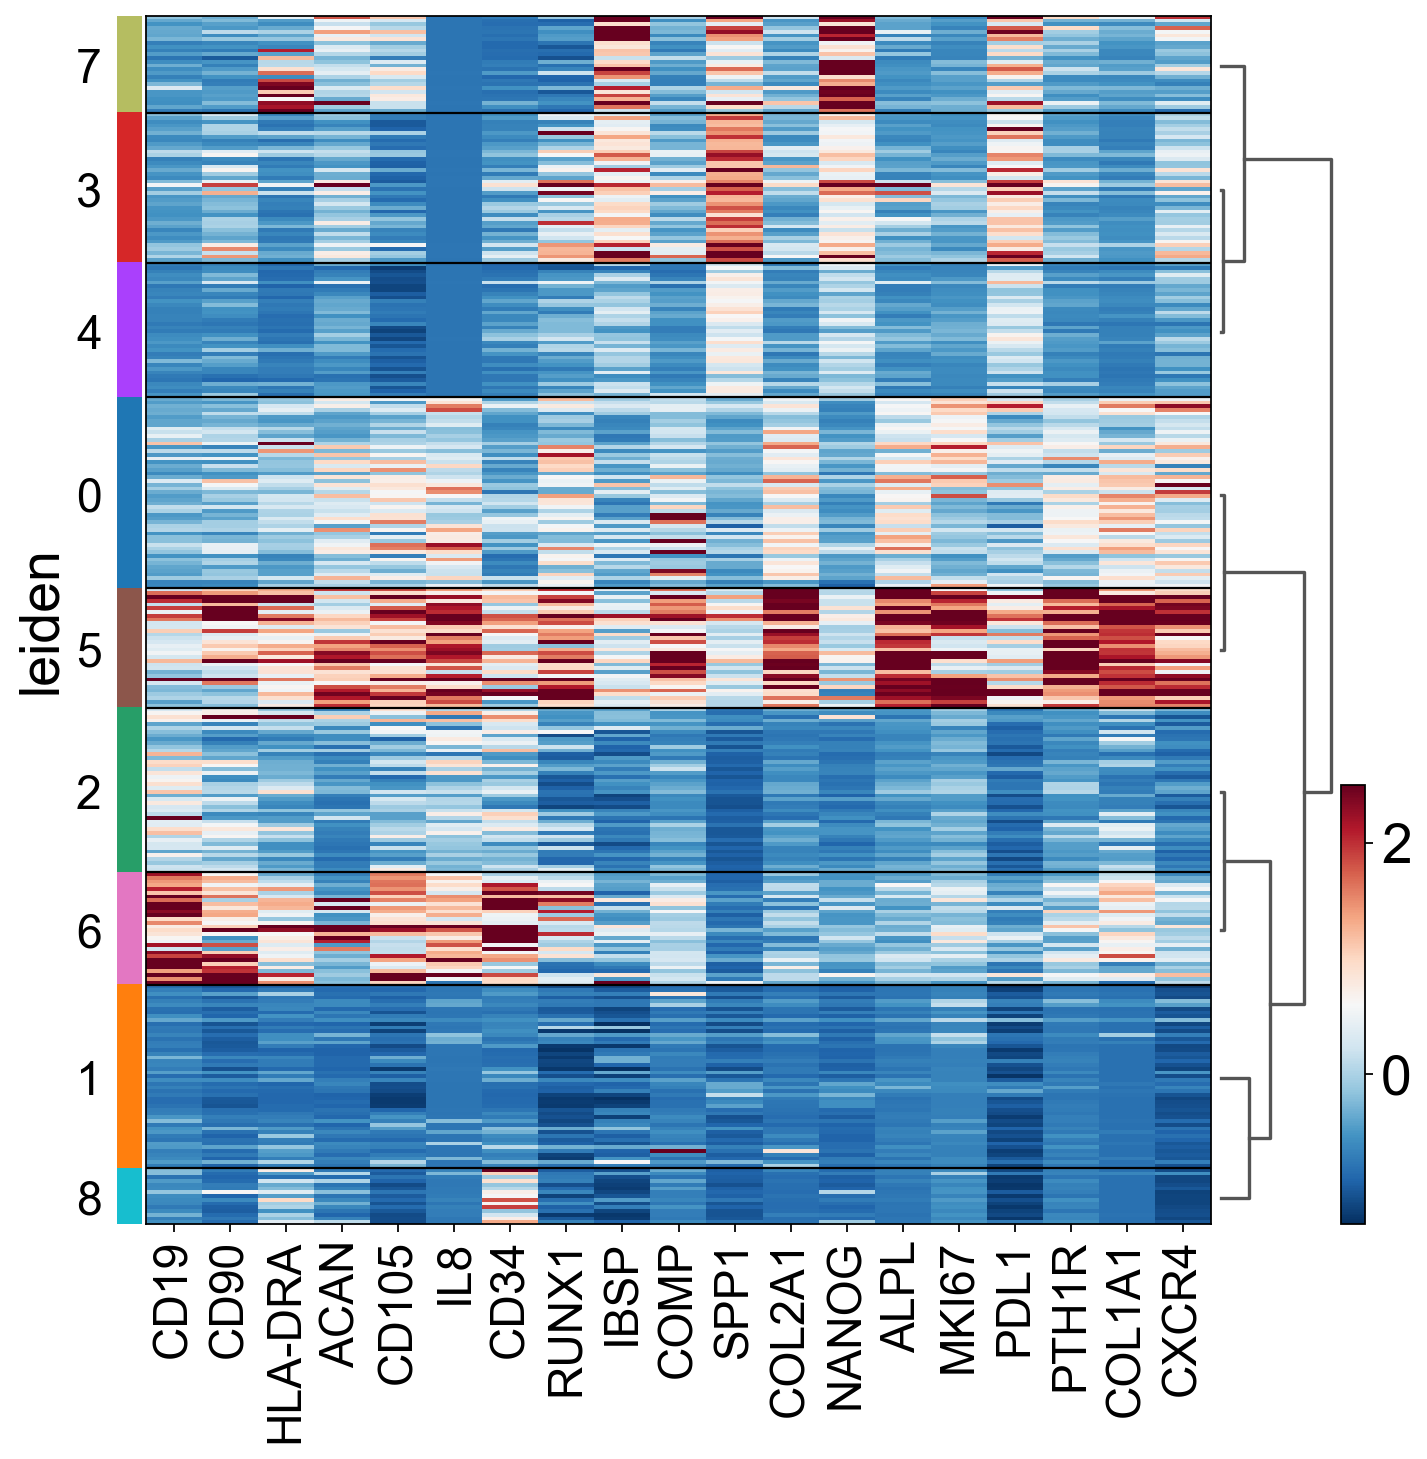

In [198]:
heatmap = sc.pl.heatmap(dropped_adata, dropped_adata.var_names.tolist(), 'leiden', dendrogram=True, cmap='RdBu_r', figsize=(10,10), save=' reduced markers single cell.png')

In [200]:
cell_types = pd.Categorical(['BM']*len(bm_subframe['cell_ID'].tolist())+['UC']*len(uc_subframe['cell_ID'].tolist()),
                            ordered=True, categories=['BM', 'UC'])
dropped_adata.obs['cell_groups'] = cell_types
dropped_adata.uns['cell_groups_colors'] = ['#0000ff', '#ff0000']

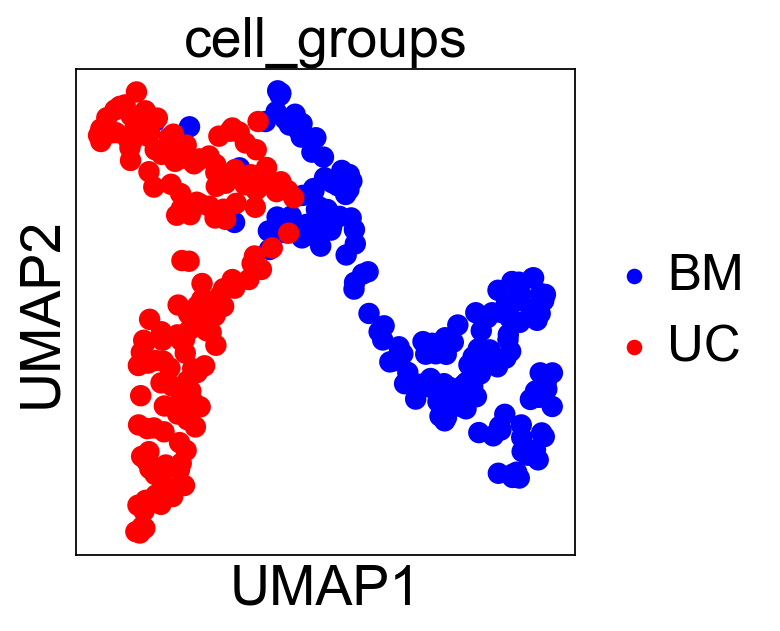

In [201]:
sc.pl.umap(dropped_adata, color=['cell_groups'], save=' reduced gene cell type.png')

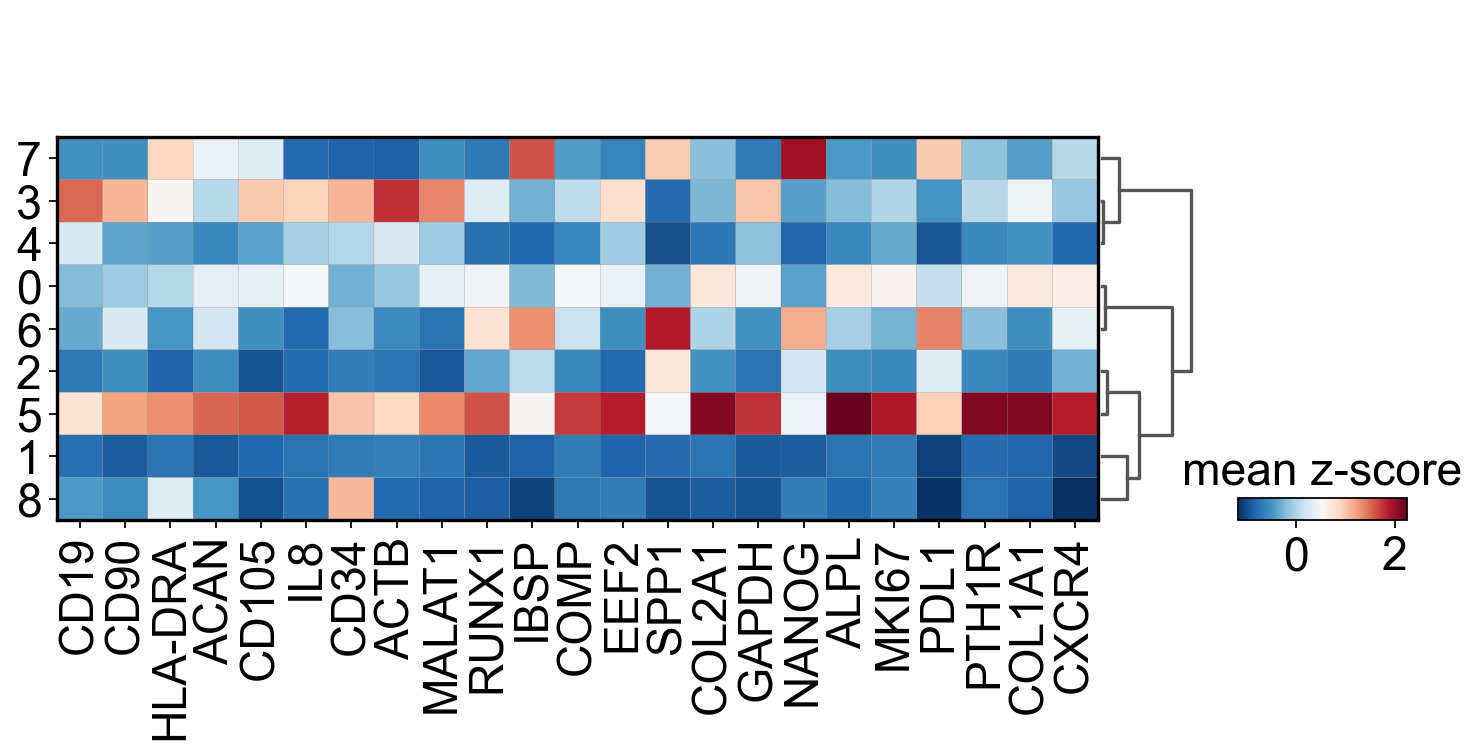

In [202]:
sc.pl.matrixplot(adata, adata.var_names.tolist(), 'leiden', dendrogram=True,
                 colorbar_title='mean z-score', cmap='RdBu_r', save=' reduced markers.png')

# Normalize by copy number per cell

In [70]:
bm_array = bm_cells.values[:,1:]
uc_array = uc_cells_subframe.values[:,1:]
bm_array_norm = bm_cells/np.sum(bm_array, axis=1).reshape(bm_cells.shape[0], 1)
uc_array_norm = uc_cells/np.sum(uc_array, axis=1).reshape(uc_cells.shape[0], 1)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [71]:
bm_cells.shape

(148, 29)

In [72]:
bm_values = bm_cells.values[:,1:]

In [73]:
np.sum(bm_values, axis=1).shape

(148,)

In [74]:
bm_ntpm = (bm_values / np.sum(bm_values, axis=1).reshape(148,1)).astype('float')

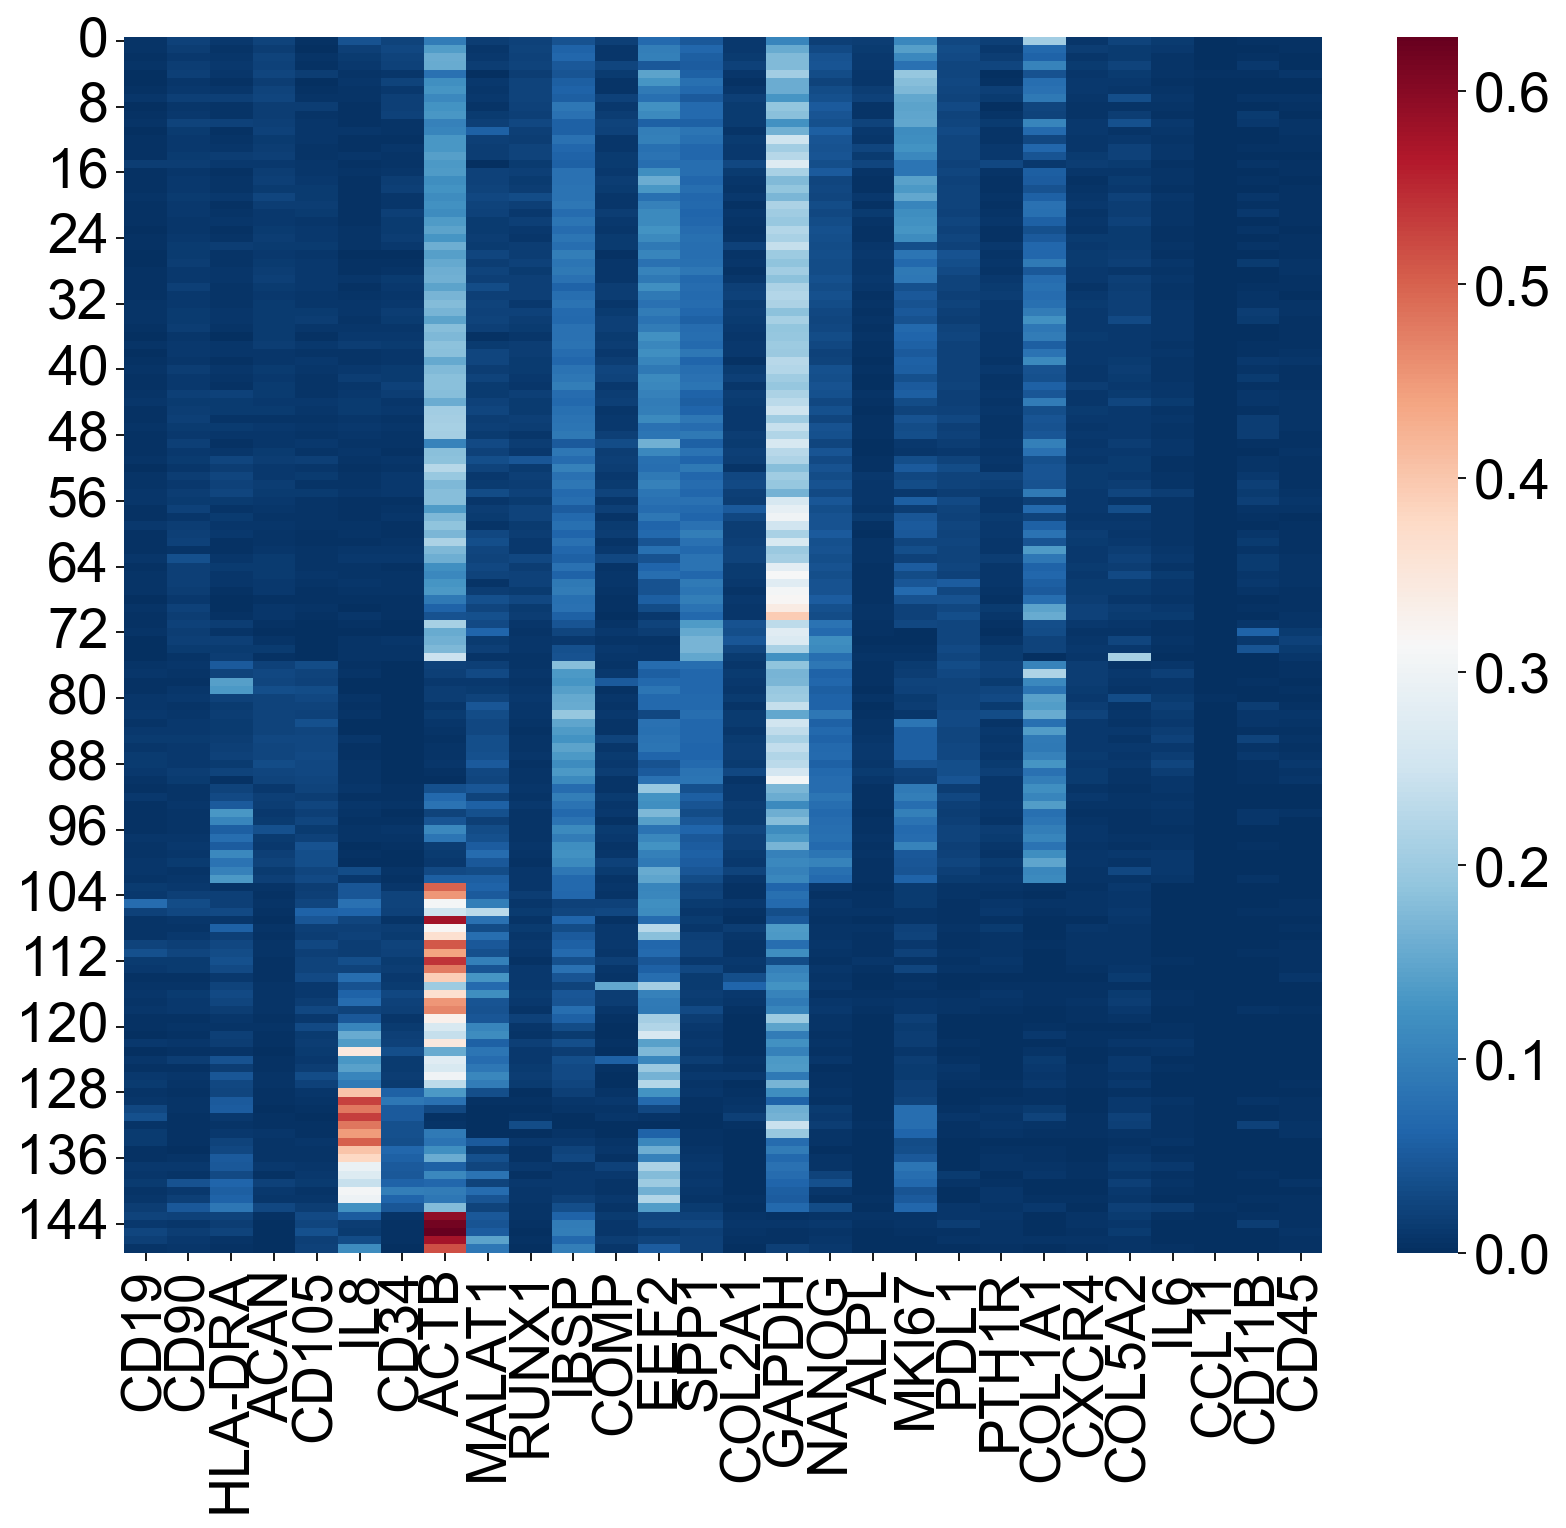

In [35]:
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(bm_ntpm, cmap='RdBu_r', xticklabels=bm_cells.columns.tolist()[1:])
f.savefig('.\\figures\\bm_ntpm_heatmap.png')

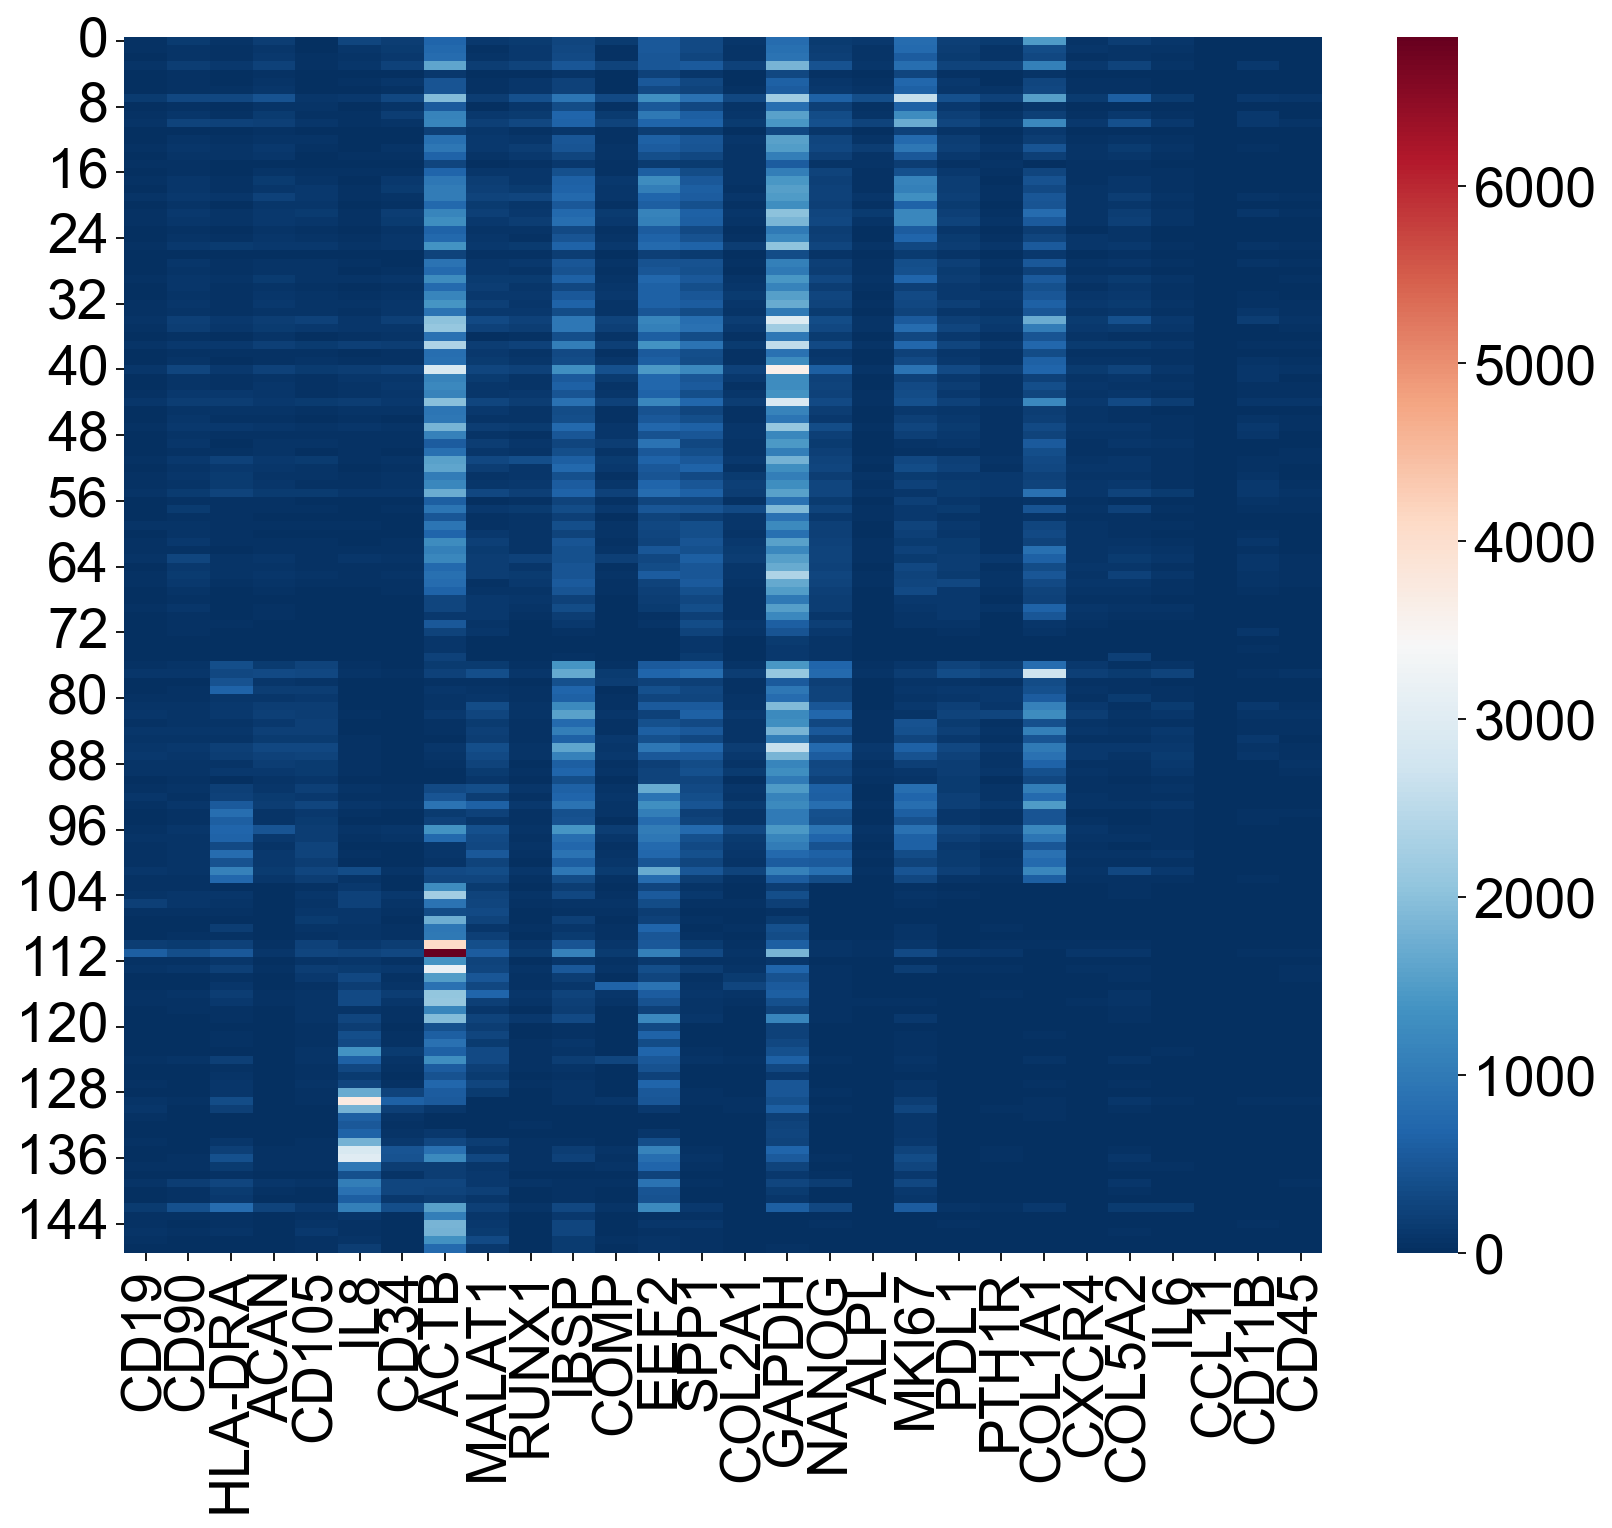

In [36]:
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(bm_values.astype('float'), cmap='RdBu_r', xticklabels=bm_cells.columns.tolist()[1:])
f.savefig('.\\figures\\bm_counts_heatmap_28_genes.png')

In [77]:
bm_values_adata = sc.AnnData(bm_values)
bm_values_adata.var_names = bm_cells.columns.tolist()[1:]
bm_values_adata.obs['Cell'] = bm_cells['cell_ID'].tolist()

In [89]:
bm_values_adata.Raw = bm_values_adata
ntpm_adata = sc.AnnData(bm_ntpm)
ntpm_adata.var_names = bm_cells.columns.tolist()[1:]
bm_values_adata.ntpm = ntpm_adata

In [90]:
sc.pp.scale(bm_values_adata, max_value=2.5)

In [91]:
sc.pp.neighbors(bm_values_adata)
sc.tl.umap(bm_values_adata)

In [92]:
sc.tl.leiden(bm_values_adata, resolution=1)

In [100]:
bm_values_adata

AnnData object with n_obs × n_vars = 148 × 28
    obs: 'Cell', 'leiden'
    var: 'mean', 'std'
    uns: 'neighbors', 'umap', 'leiden', 'leiden_colors', 'dendrogram_leiden'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [102]:
ntpm_adata.obs['leiden'] = bm_values_adata.obs['leiden']
ntpm_adata.uns['leiden'] = bm_values_adata.uns['leiden']
ntpm_adata.uns['leiden_colors'] = bm_values_adata.uns['leiden_colors']
ntpm_adata.uns['dendrogram_leiden'] = bm_values_adata.uns['dendrogram_leiden']

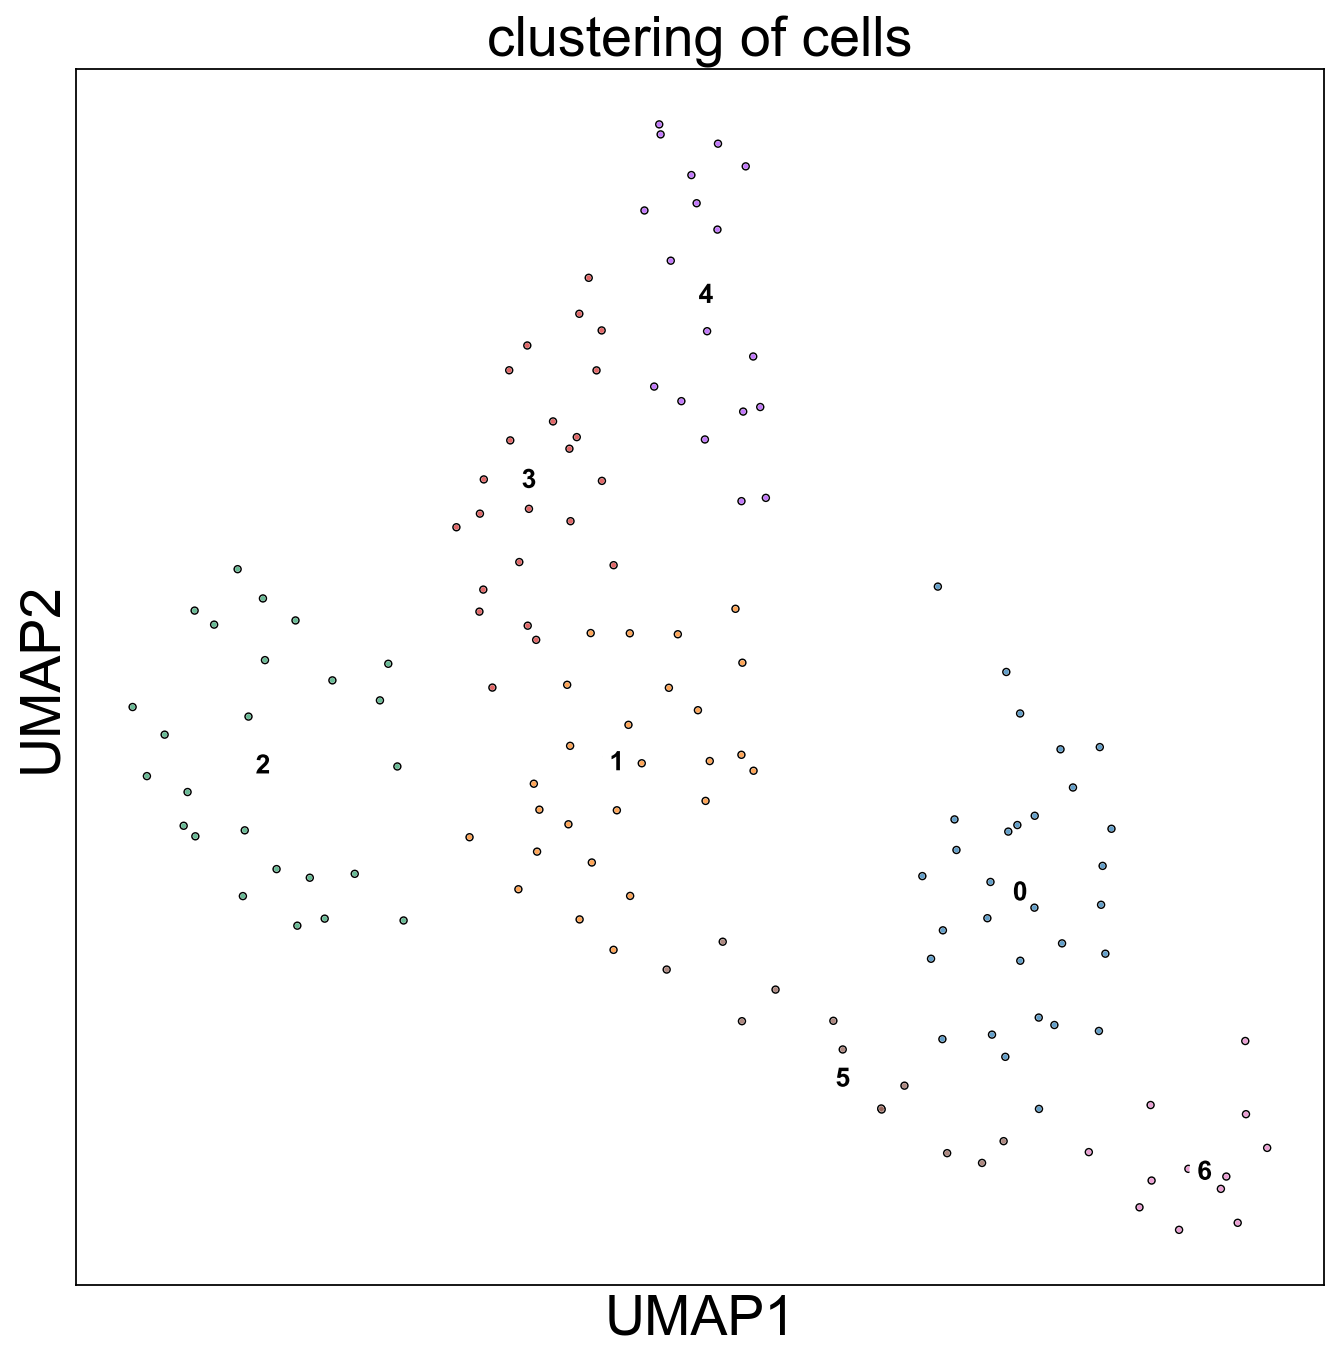

In [93]:
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(bm_values_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=12, legend_fontoutline=8, 
               frameon=True,  title='clustering of cells')

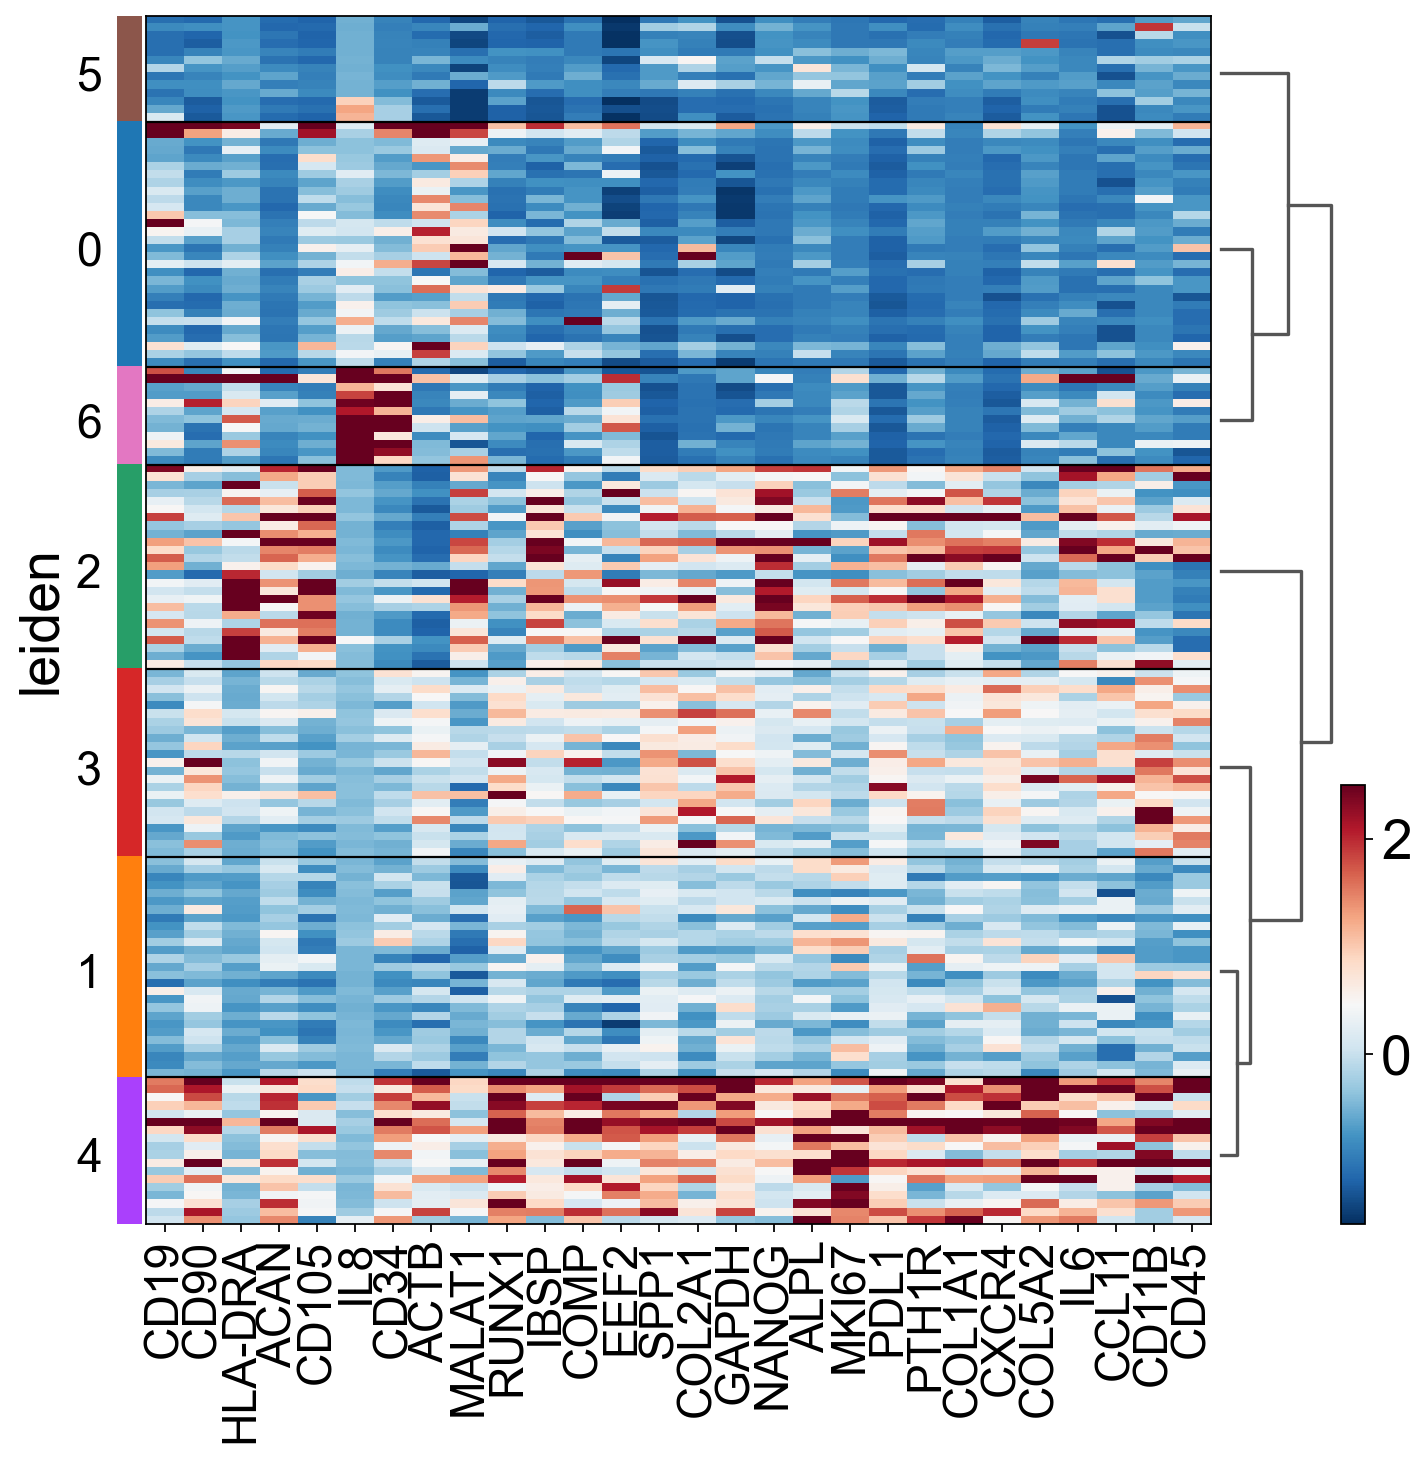

In [103]:
heatmap = sc.pl.heatmap(bm_values_adata.Raw, bm_values_adata.var_names.tolist(), 'leiden', dendrogram=True, cmap='RdBu_r', figsize=(10,10))

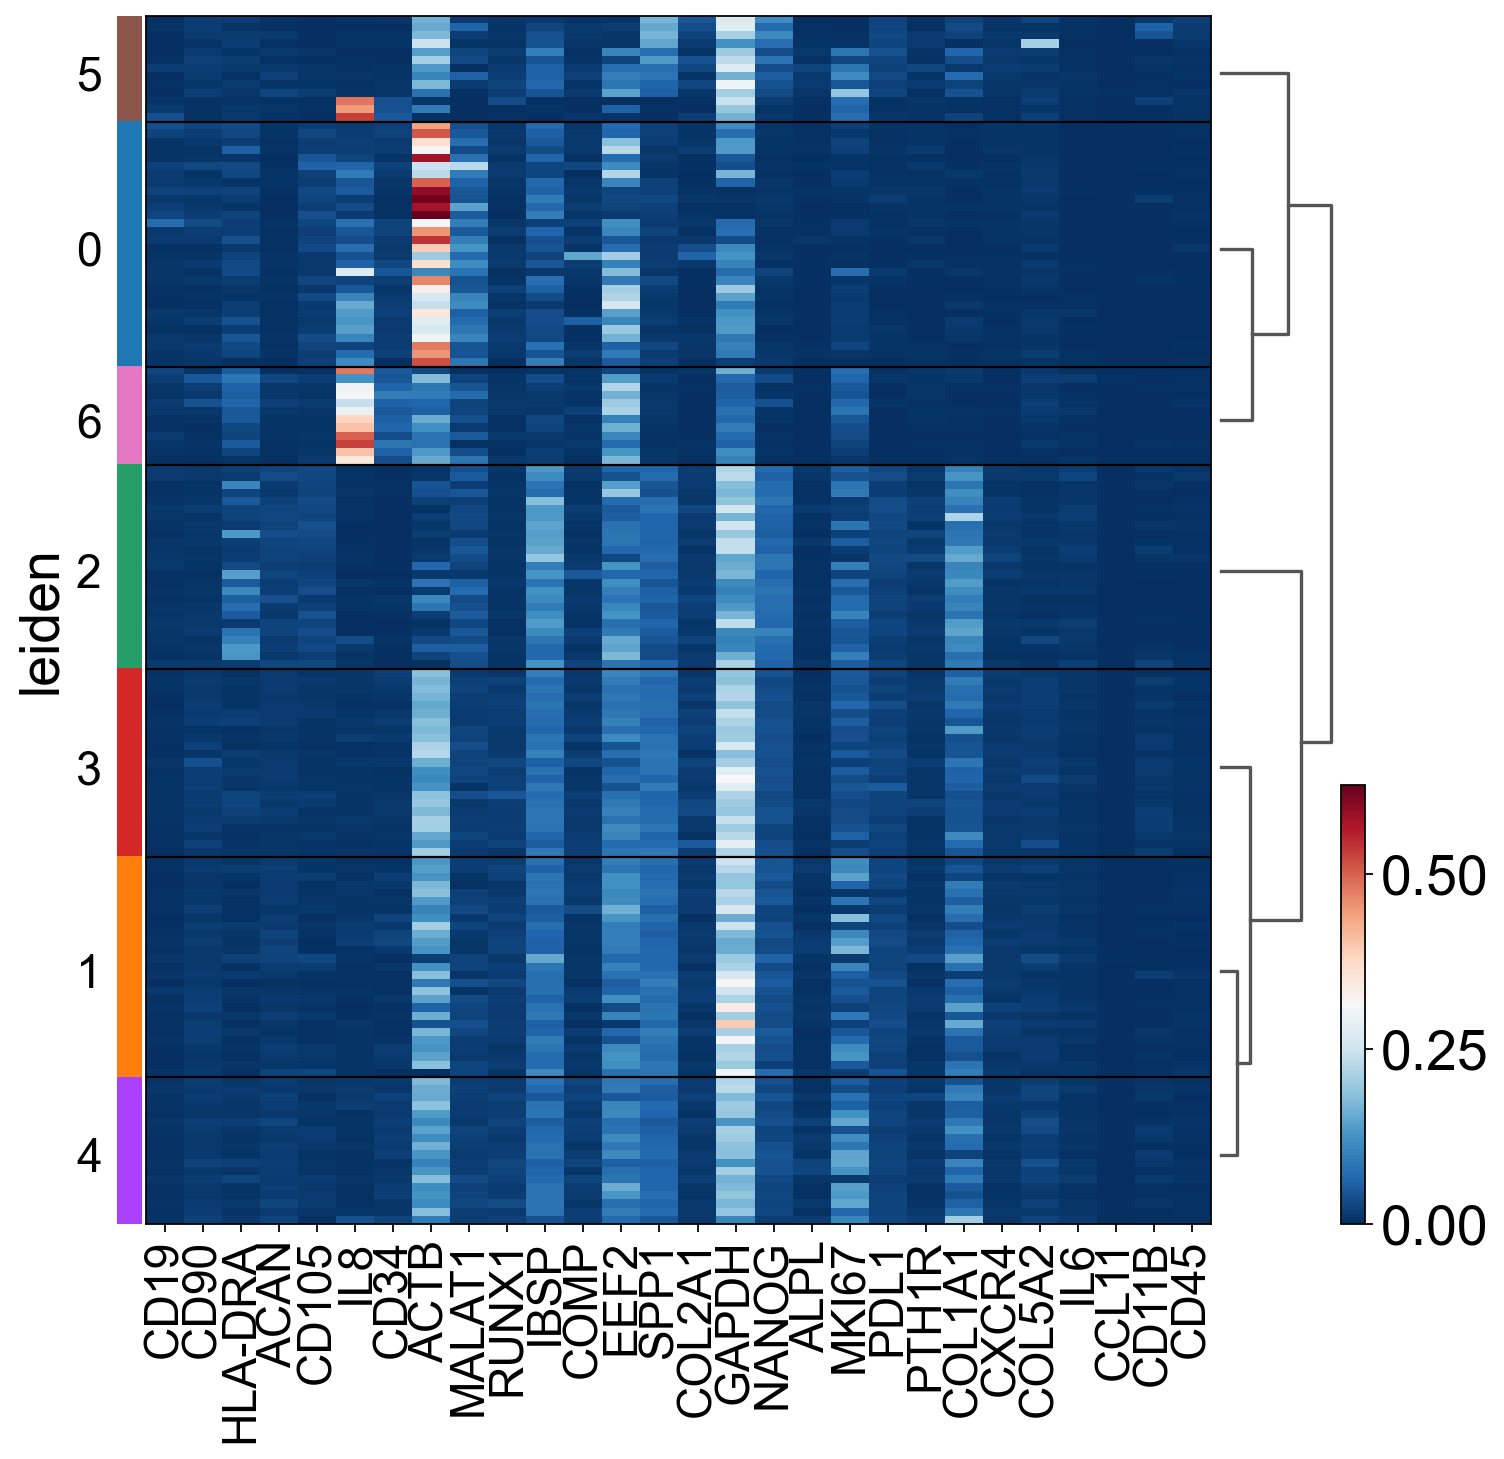

In [106]:
heatmap = sc.pl.heatmap(ntpm_adata, ntpm_adata.var_names.tolist(), 'leiden', dendrogram=True, cmap='RdBu_r', figsize=(10,10), save='28_gene_clustered_ntpm.png')

In [ ]:
# Include bm and uc comined analysis
# Coloring original cell